In [1]:
library("data.table")
library(pheatmap)
library(ggpubr)
library(ggfortify)
library(reshape)
library(dplyr)

Loading required package: ggplot2


Attaching package: ‘reshape’


The following object is masked from ‘package:data.table’:

    melt



Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
cosmic_genes<-fread("cosmic_hallmarks.txt",header=F)
cosmic_genes<-as.data.frame(cosmic_genes)
colnames(cosmic_genes)<-c("gene")

cosmic_matched_genes<-fread("cosmic_driver_matched.txt",header=F)
cosmic_matched_genes<-as.data.frame(cosmic_matched_genes)
colnames(cosmic_matched_genes)<-c("gene")

In [3]:
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","^pan_tissue_unweighted_5_.*.csv")) {print(file)}

[1] "pan_tissue_unweighted_5_fractions_aandersoni_regen_down.csv"
[1] "pan_tissue_unweighted_5_fractions_aandersoni_regen_up.csv"
[1] "pan_tissue_unweighted_5_fractions_amaculatum_regen_down.csv"
[1] "pan_tissue_unweighted_5_fractions_amaculatum_regen_up.csv"
[1] "pan_tissue_unweighted_5_fractions_amexicanum_regen_down.csv"
[1] "pan_tissue_unweighted_5_fractions_amexicanum_regen_up.csv"
[1] "pan_tissue_unweighted_5_fractions_celegans_stress_down.csv"
[1] "pan_tissue_unweighted_5_fractions_celegans_stress_up.csv"
[1] "pan_tissue_unweighted_5_fractions_clupisFamiliaris_wound_down.csv"
[1] "pan_tissue_unweighted_5_fractions_clupisFamiliaris_wound_up.csv"
[1] "pan_tissue_unweighted_5_fractions_dmelanogaster_stress_down.csv"
[1] "pan_tissue_unweighted_5_fractions_dmelanogaster_stress_up.csv"
[1] "pan_tissue_unweighted_5_fractions_dmelanogaster_wound_down.csv"
[1] "pan_tissue_unweighted_5_fractions_dmelanogaster_wound_up.csv"
[1] "pan_tissue_unweighted_5_fractions_downregulated.regen.csv"
[1

In [4]:
fractions_list <- list()
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","pan_tissue_unweighted_5_fractions_.*.csv")) {
    fractions_list[[gsub(".csv", "",file)]] <- fread(paste("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/",
                                                                     file, sep = ""))
}

In [5]:
names(fractions_list)

[1] "pan_tissue_unweighted_5_fractions_aandersoni_regen_down"      
 [2] "pan_tissue_unweighted_5_fractions_aandersoni_regen_up"        
 [3] "pan_tissue_unweighted_5_fractions_amaculatum_regen_down"      
 [4] "pan_tissue_unweighted_5_fractions_amaculatum_regen_up"        
 [5] "pan_tissue_unweighted_5_fractions_amexicanum_regen_down"      
 [6] "pan_tissue_unweighted_5_fractions_amexicanum_regen_up"        
 [7] "pan_tissue_unweighted_5_fractions_celegans_stress_down"       
 [8] "pan_tissue_unweighted_5_fractions_celegans_stress_up"         
 [9] "pan_tissue_unweighted_5_fractions_clupisFamiliaris_wound_down"
[10] "pan_tissue_unweighted_5_fractions_clupisFamiliaris_wound_up"  
[11] "pan_tissue_unweighted_5_fractions_dmelanogaster_stress_down"  
[12] "pan_tissue_unweighted_5_fractions_dmelanogaster_stress_up"    
[13] "pan_tissue_unweighted_5_fractions_dmelanogaster_wound_down"   
[14] "pan_tissue_unweighted_5_fractions_dmelanogaster_wound_up"     
[15] "pan_tissue_unweighted_5_fractions_downregulated.regen"        
[16] "pan_tissue_unweighted_5_fractions_downregulated.stress"       
[17] "pan_tissue_unweighted_5_fractions_downregulated.wound"        
[18] "pan_tissue_unweighted_5_fractions_drerio_regen_down"          
[19] "pan_tissue_unweighted_5_fractions_drerio_regen_up"            
[20] "pan_tissue_unweighted_5_fractions_ecoli_stress_down"          
[21] "pan_tissue_unweighted_5_fractions_ecoli_stress_up"            
[22] "pan_tissue_unweighted_5_fractions_hsapiens_regen_down"        
[23] "pan_tissue_unweighted_5_fractions_hsapiens_regen_up"          
[24] "pan_tissue_unweighted_5_fractions_hsapiens_stress_down"       
[25] "pan_tissue_unweighted_5_fractions_hsapiens_stress_up"         
[26] "pan_tissue_unweighted_5_fractions_hsapiens_wound_down"        
[27] "pan_tissue_unweighted_5_fractions_hsapiens_wound_up"          
[28] "pan_tissue_unweighted_5_fractions_mmusculus_stress_down"      
[29] "pan_tissue_unweighted_5_fractions_mmusculus_stress_up"        
[30] "pan_tissue_unweighted_5_fractions_msigdb.regen"               
[31] "pan_tissue_unweighted_5_fractions_msigdb.stress"              
[32] "pan_tissue_unweighted_5_fractions_msigdb.wound"               
[33] "pan_tissue_unweighted_5_fractions_rnorvegicus_wound_down"     
[34] "pan_tissue_unweighted_5_fractions_rnorvegicus_wound_up"       
[35] "pan_tissue_unweighted_5_fractions_sscrofa_wound_down"         
[36] "pan_tissue_unweighted_5_fractions_sscrofa_wound_up"           
[37] "pan_tissue_unweighted_5_fractions_upregulated.regen"          
[38] "pan_tissue_unweighted_5_fractions_upregulated.stress"         
[39] "pan_tissue_unweighted_5_fractions_upregulated.wound"          
[40] "pan_tissue_unweighted_5_fractions_xlaevis_wound_down"         
[41] "pan_tissue_unweighted_5_fractions_xlaevis_wound_up"           
[42] "pan_tissue_unweighted_5_fractions_xtropicalis_regen_down"     
[43] "pan_tissue_unweighted_5_fractions_xtropicalis_regen_up"

In [6]:
fractions_list_exp <- fractions_list[grep("upregulated|downregulated|msigdb",names(fractions_list))]
#fractions_list_spec_exp <- fractions_list[grep("up$|down$",names(fractions_list))]

In [7]:
names(fractions_list_exp)
#names(fractions_list_spec_exp)

[1] "pan_tissue_unweighted_5_fractions_downregulated.regen" 
[2] "pan_tissue_unweighted_5_fractions_downregulated.stress"
[3] "pan_tissue_unweighted_5_fractions_downregulated.wound" 
[4] "pan_tissue_unweighted_5_fractions_msigdb.regen"        
[5] "pan_tissue_unweighted_5_fractions_msigdb.stress"       
[6] "pan_tissue_unweighted_5_fractions_msigdb.wound"        
[7] "pan_tissue_unweighted_5_fractions_upregulated.regen"   
[8] "pan_tissue_unweighted_5_fractions_upregulated.stress"  
[9] "pan_tissue_unweighted_5_fractions_upregulated.wound"

In [8]:
fractions_list_exp[[4]]

gene_msigdb.regen,msigdb.regen_Fraction_sp_less4,msigdb.regen_Fraction_sp_less3,msigdb.regen_Fraction_sp_less2,msigdb.regen_Fraction_sp_1,msigdb.regen_Fraction_sp_0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCOF1,0.011014711,0.003470389,1.508865e-04,1.508865e-04,0
NSRP1,0.011693700,0.005356469,3.017729e-04,3.017729e-04,0
SPPL3,0.011769144,0.005356469,7.544323e-05,7.544323e-05,0
OPA3,0.011693700,0.004979253,0.000000e+00,0.000000e+00,0
OPA1,0.011241041,0.002187854,0.000000e+00,0.000000e+00,0
ITGA8,0.011391928,0.004224821,1.508865e-04,1.508865e-04,0
ITGA9,0.011090155,0.004526594,1.508865e-04,1.508865e-04,0
ITGA1,0.011844587,0.005733685,5.281026e-04,5.281026e-04,0
ITGA2,0.010939268,0.003923048,1.508865e-04,1.508865e-04,0


# Create combined DF

In [9]:
get_combined_DF <- function(final_fractions_list, ppi_name, degree_list_file, condition){
    
    fractions_initial_combinedDF <- data.frame("gene_list" = final_fractions_list[[1]][[1]])
    for(i in 1:length(final_fractions_list)) {
        print(names(final_fractions_list)[i])
        temp <- cbind(fractions_initial_combinedDF[fractions_initial_combinedDF$gene_list %in% final_fractions_list[[i]][[1]],],
                                                            final_fractions_list[[i]][final_fractions_list[[i]][[1]] %in% fractions_initial_combinedDF$gene_list,])
        colnames(temp)[1] <- "gene_list"
        print(nrow(temp))
        print(ncol(temp))
        fractions_initial_combinedDF <- temp
    }
    
    condition_regex <- paste("(",(paste(condition, "gene_list", sep="|")), ")", sep="")


    #oncogenic_status<-gsub(" ", "", combinedDF$gene_regen) %in% as.character(cosmic_genes$gene)
    oncogenic_status<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_genes$gene)
    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"oncogenic_status" =as.character(oncogenic_status))


    oncogenic_status_degree_matched<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_matched_genes$gene)
    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"degree_matched_oncogenic_status" =as.character(oncogenic_status_degree_matched))

    current_oncogenic_status <- as.factor(fractions_initial_combinedDF$oncogenic_status)
    levels(current_oncogenic_status) <- c("Non-Cancer-Driver", "COSMIC-Driver")
    current_oncogenic_status <- as.character(current_oncogenic_status)
    current_oncogenic_status[fractions_initial_combinedDF$degree_matched_oncogenic_status == 'TRUE'] <- 'Matched-Controls'

    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"total_oncogenic_status" =current_oncogenic_status)  
    
    degree <- fread(degree_list_file, header=F)
    overlapping_degree_genes <- fractions_initial_combinedDF[fractions_initial_combinedDF$gene_list %in% degree$V1,]
    nrow(overlapping_degree_genes)
    degree_list <- degree[degree$V1 %in% overlapping_degree_genes$gene_list]$V2
    length(degree_list)
    current_oncogenic_status <- as.factor(overlapping_degree_genes$oncogenic_status)
    levels(current_oncogenic_status) <- c(0, 1)
    
    #print(grep(condition,colnames(overlapping_degree_genes)))
    if (sum(grep(condition,colnames(overlapping_degree_genes))) > 1) {
        
        cols <- colnames(overlapping_degree_genes)[grep("(up_Fraction_sp_less3$|gene_list)",
                                                        colnames(overlapping_degree_genes))]
    
        up_fractions<- overlapping_degree_genes[,..cols]

        up_fraction_input_total <- cbind("degree" = degree_list, up_fractions, "label" = current_oncogenic_status)
        up_fraction_input_total <- up_fraction_input_total %>% relocate(gene_list, .after = last_col())

        up_cd<- up_fraction_input_total[up_fraction_input_total$label == 1,]
        up_ncd<- up_fraction_input_total[up_fraction_input_total$label == 0,]

        sampled_up_cd <- up_cd[sample(nrow(up_cd)),]
        sampled_up_ncd <- up_ncd[sample(nrow(up_ncd)),]
        cols <- colnames(overlapping_degree_genes)[grep("(down_Fraction_sp_less3$|gene_list)",
                                                        colnames(overlapping_degree_genes))]
    
        down_fractions<- overlapping_degree_genes[,..cols]

        down_fraction_input_total <- cbind("degree" = degree_list, down_fractions, "label" = current_oncogenic_status)
        down_fraction_input_total <- down_fraction_input_total %>% relocate(gene_list, .after = last_col())


        down_cd<- down_fraction_input_total[down_fraction_input_total$label == 1,]
        down_ncd<- down_fraction_input_total[down_fraction_input_total$label == 0,]

        sampled_down_cd <- down_cd[sample(nrow(down_cd)),]
        sampled_down_ncd <- down_ncd[sample(nrow(down_ncd)),]
        
        
        ###up
        write.table(up_fraction_input_total,
                   paste("./machine_learning/",ppi_name, "_up_fraction_total.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        #print(sampled_up_cd[1:round((nrow(sampled_up_cd)*.8)),1:length(up_fraction_input_total)-1])
        write.table(rbind(sampled_up_cd[1:round((nrow(sampled_up_cd)*.8)),1:length(up_fraction_input_total)-1], sampled_up_ncd[1:round(nrow(sampled_up_ncd)*.8),1:length(up_fraction_input_total) -1]),
                    paste("./machine_learning/",ppi_name, "_up_fraction_train.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(rbind(sampled_up_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_up_cd),1:length(up_fraction_input_total)-1], sampled_up_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_up_ncd),1:length(up_fraction_input_total)-1]),
                    paste("./machine_learning/",ppi_name, "_up_fraction_test.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)


        write.table(c(sampled_up_cd[1:round((nrow(sampled_up_cd)*.8)),]$gene_list, sampled_up_ncd[1:round(nrow(sampled_up_ncd)*.8),]$gene_list),
                    paste("./machine_learning/",ppi_name, "_up_fraction_train_gene_list.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(c(sampled_up_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_up_cd),]$gene_list, sampled_up_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_up_ncd),]$gene_list),
                    paste("./machine_learning/",ppi_name, "_up_fraction_test_gene_list.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        ###  down
        write.table(down_fraction_input_total,
                    paste("./machine_learning/",ppi_name, "_down_fraction_total.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=FALSE)

        write.table(rbind(sampled_down_cd[1:round((nrow(sampled_up_cd)*.8)),], sampled_down_ncd[1:round(nrow(sampled_up_ncd)*.8),]),
                    paste("./machine_learning/",ppi_name, "_down_fraction_train.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(rbind(sampled_down_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_down_cd),], sampled_down_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_down_ncd),]),
                    paste("./machine_learning/",ppi_name, "_down_fraction_test.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
    }
    
    cols <- colnames(overlapping_degree_genes)[grep(condition_regex,
                                                    colnames(overlapping_degree_genes))]
    
    total_fractions<- overlapping_degree_genes[,..cols]
    total_fraction_input_total <- cbind("degree" = degree_list, total_fractions, "label" = current_oncogenic_status)
    total_fraction_input_total <- total_fraction_input_total %>% relocate(gene_list, .after = last_col())

    total_cd<- total_fraction_input_total[total_fraction_input_total$label == 1,]
    total_ncd<- total_fraction_input_total[total_fraction_input_total$label == 0,]

    sampled_total_cd <- data.frame(total_cd[sample(nrow(total_cd)),])
    sampled_total_ncd <- data.frame(total_ncd[sample(nrow(total_ncd)),])
    
    

    ### total
    write.table(total_fraction_input_total,
                paste("./machine_learning/",ppi_name, "_total_fraction_total.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(rbind(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),1:length(total_fraction_input_total)-1], sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),1:length(total_fraction_input_total) -1]),
                paste("./machine_learning/",ppi_name, "_total_fraction_train.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(rbind(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),1:length(total_fraction_input_total)-1], sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),1:length(total_fraction_input_total)-1]),
                paste("./machine_learning/",ppi_name, "_total_fraction_test.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)


    write.table(c(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),]$gene_list, sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),]$gene_list),
                paste("./machine_learning/",ppi_name, "_total_fraction_train_gene_list.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(c(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),]$gene_list, sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),]$gene_list),
                paste("./machine_learning/",ppi_name, "_total_fraction_test_gene_list.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)

    return(fractions_initial_combinedDF)
}

In [10]:
head(fractions_list_exp)

gene_downregulated.regen,downregulated.regen_Fraction_sp_less4,downregulated.regen_Fraction_sp_less3,downregulated.regen_Fraction_sp_less2,downregulated.regen_Fraction_sp_1,downregulated.regen_Fraction_sp_0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCOF1,0.055752546,0.013278008,6.035458e-04,6.035458e-04,0.000000e+00
NSRP1,0.059072048,0.029045643,6.789891e-04,6.789891e-04,0.000000e+00
SPPL3,0.058619389,0.023538287,7.544323e-04,7.544323e-04,0.000000e+00
OPA3,0.058619389,0.022029423,3.772161e-04,3.772161e-04,0.000000e+00
OPA1,0.056808751,0.012221803,0.000000e+00,0.000000e+00,0.000000e+00
ITGA8,0.057864957,0.023689174,3.394945e-03,3.394945e-03,0.000000e+00
ITGA9,0.057864957,0.025801584,3.244059e-03,3.244059e-03,0.000000e+00
ITGA1,0.060656356,0.029875519,3.923048e-03,3.923048e-03,0.000000e+00
ITGA2,0.058015843,0.019917012,1.131648e-03,1.056205e-03,7.544323e-05


In [11]:
fractions_combinedDF_EXP <- get_combined_DF(fractions_list_exp, "pan_tissue_5_EXP",
                                            "../wgcna_tutorial/pan_tissue_unweighted_degree_list.5.txt",
                                            "Fraction_sp_less3$")

## excluding humans
#fractions_combinedDF_SPEC_EXP <- get_combined_DF(fractions_list_spec_exp[grep("hsapiens", names(fractions_list_spec_exp), invert=T)], "pan_cancer")

[1] "pan_tissue_unweighted_5_fractions_downregulated.regen"
[1] 13990
[1] 7
[1] "pan_tissue_unweighted_5_fractions_downregulated.stress"
[1] 13990
[1] 13
[1] "pan_tissue_unweighted_5_fractions_downregulated.wound"
[1] 13990
[1] 19
[1] "pan_tissue_unweighted_5_fractions_msigdb.regen"
[1] 13990
[1] 25
[1] "pan_tissue_unweighted_5_fractions_msigdb.stress"
[1] 13990
[1] 31
[1] "pan_tissue_unweighted_5_fractions_msigdb.wound"
[1] 13990
[1] 37
[1] "pan_tissue_unweighted_5_fractions_upregulated.regen"
[1] 13990
[1] 43
[1] "pan_tissue_unweighted_5_fractions_upregulated.stress"
[1] 13990
[1] 49
[1] "pan_tissue_unweighted_5_fractions_upregulated.wound"
[1] 13990
[1] 55


# Experiment Type

In [12]:
### Upregulated

cols <- colnames(fractions_combinedDF_EXP)[grep("Fraction_sp_less3",colnames(fractions_combinedDF_EXP))]
colnames(fractions_combinedDF_EXP[,..cols])

[1] "downregulated.regen_Fraction_sp_less3" 
[2] "downregulated.stress_Fraction_sp_less3"
[3] "downregulated.wound_Fraction_sp_less3" 
[4] "msigdb.regen_Fraction_sp_less3"        
[5] "msigdb.stress_Fraction_sp_less3"       
[6] "msigdb.wound_Fraction_sp_less3"        
[7] "upregulated.regen_Fraction_sp_less3"   
[8] "upregulated.stress_Fraction_sp_less3"  
[9] "upregulated.wound_Fraction_sp_less3"

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


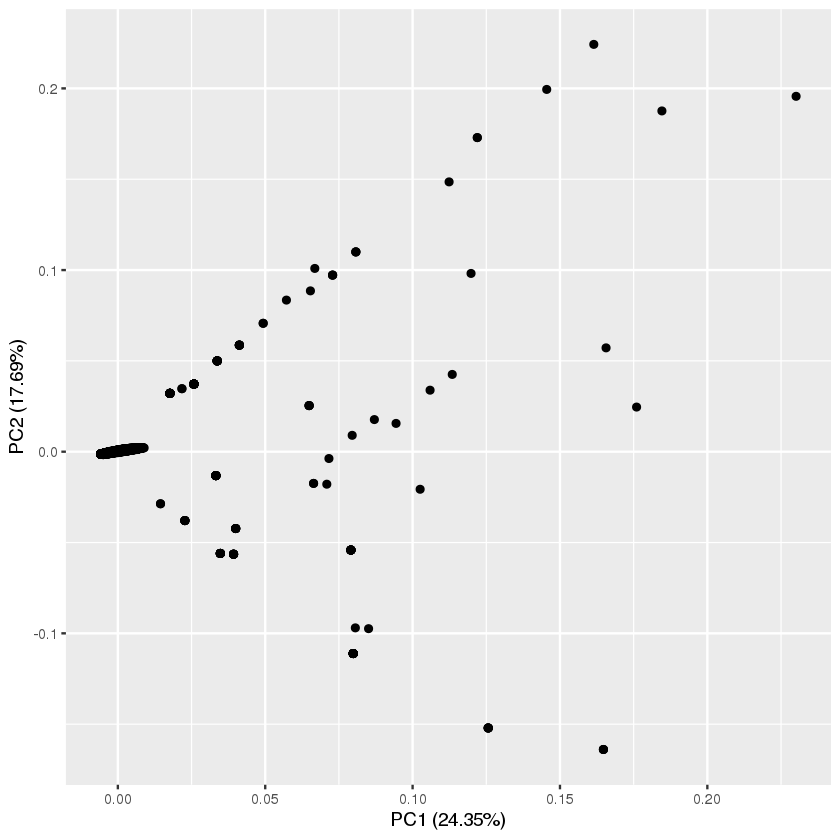

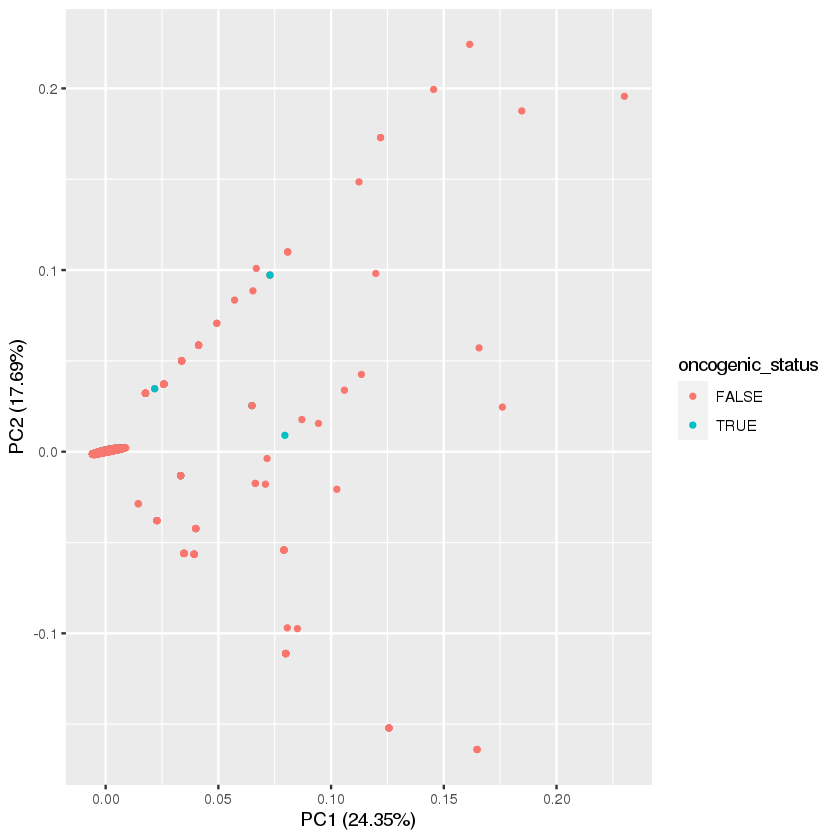

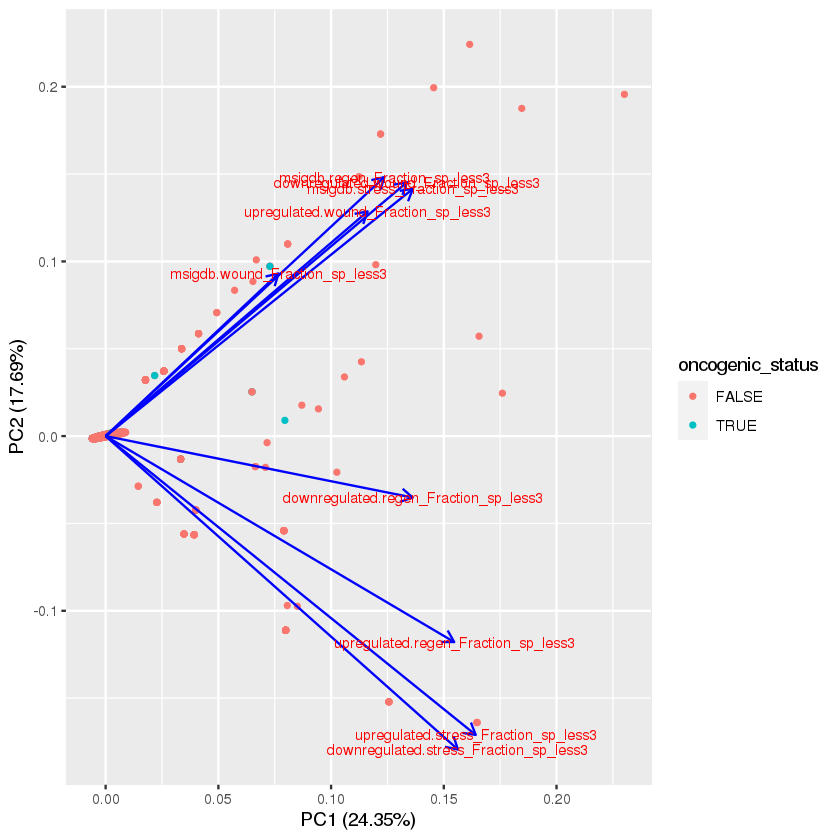

In [13]:
scale_exp <- fractions_combinedDF_EXP[,..cols]
pca_res_exp <- prcomp(scale_exp, scale. = TRUE)
autoplot(pca_res_exp)
autoplot(pca_res_exp, data = fractions_combinedDF_EXP,
         colour = 'oncogenic_status',
         size = 1)

autoplot(pca_res_exp, data = fractions_combinedDF_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,
         size = 1)

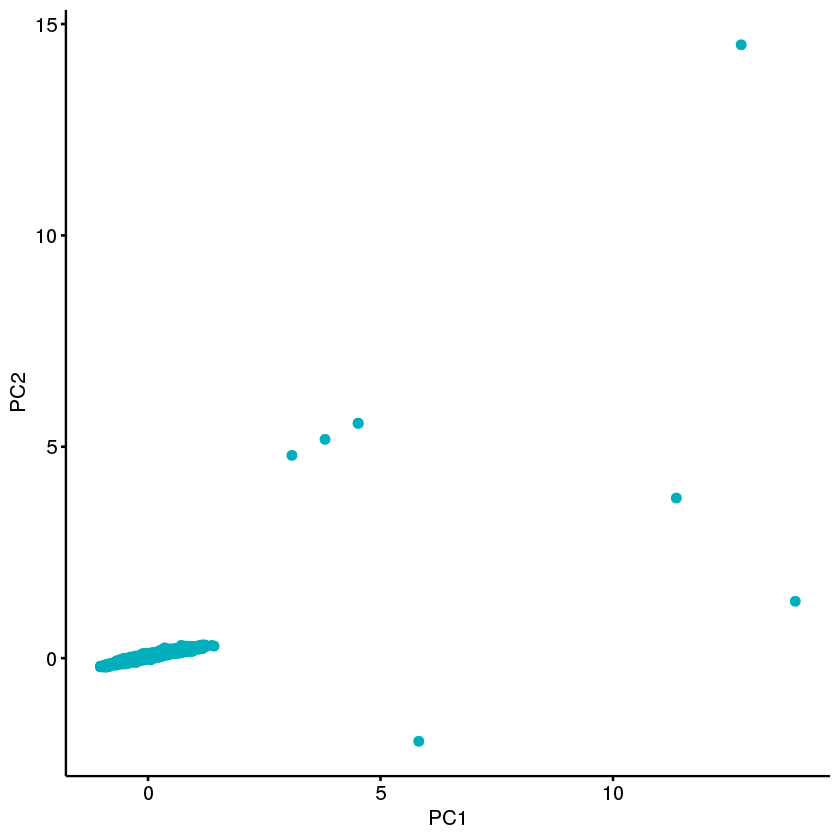

Warning message:
“Removed 98 rows containing missing values (geom_point).”


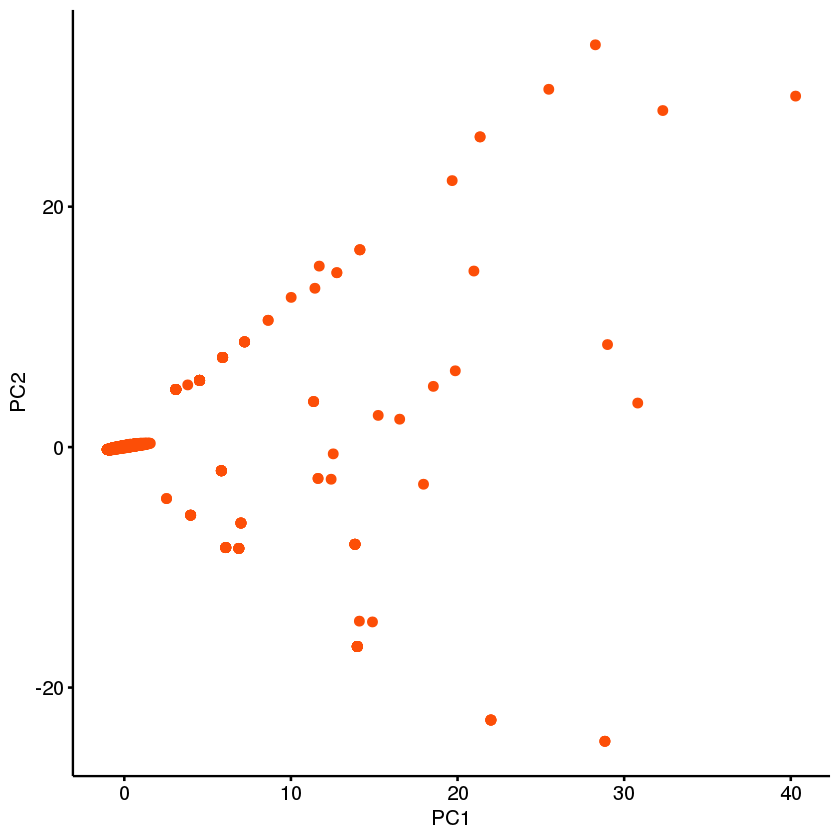

Warning message:
“Removed 1 rows containing missing values (geom_point).”


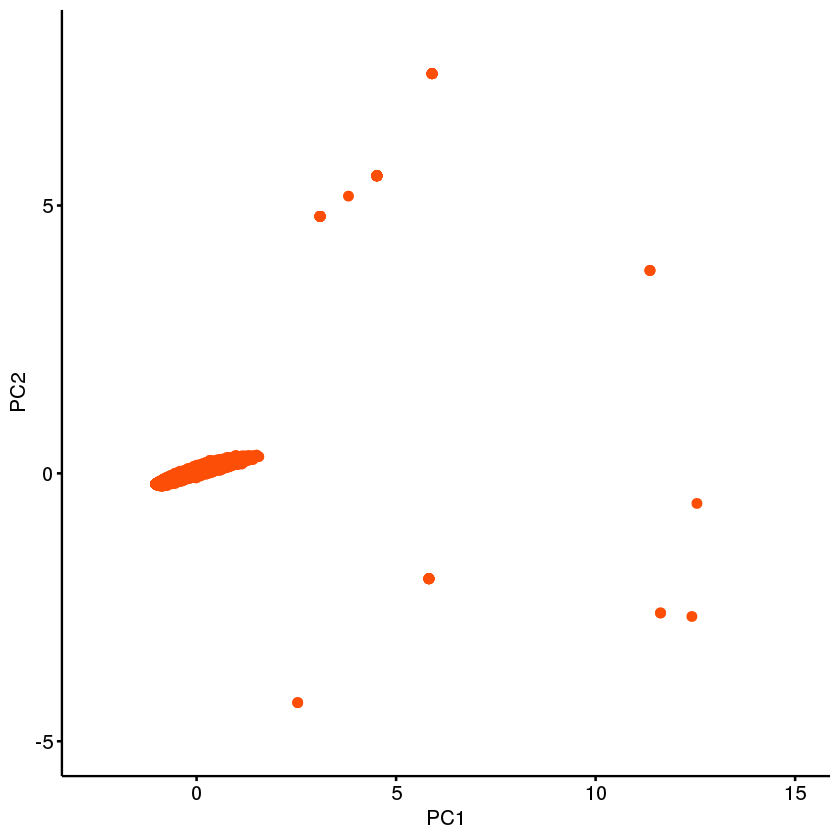

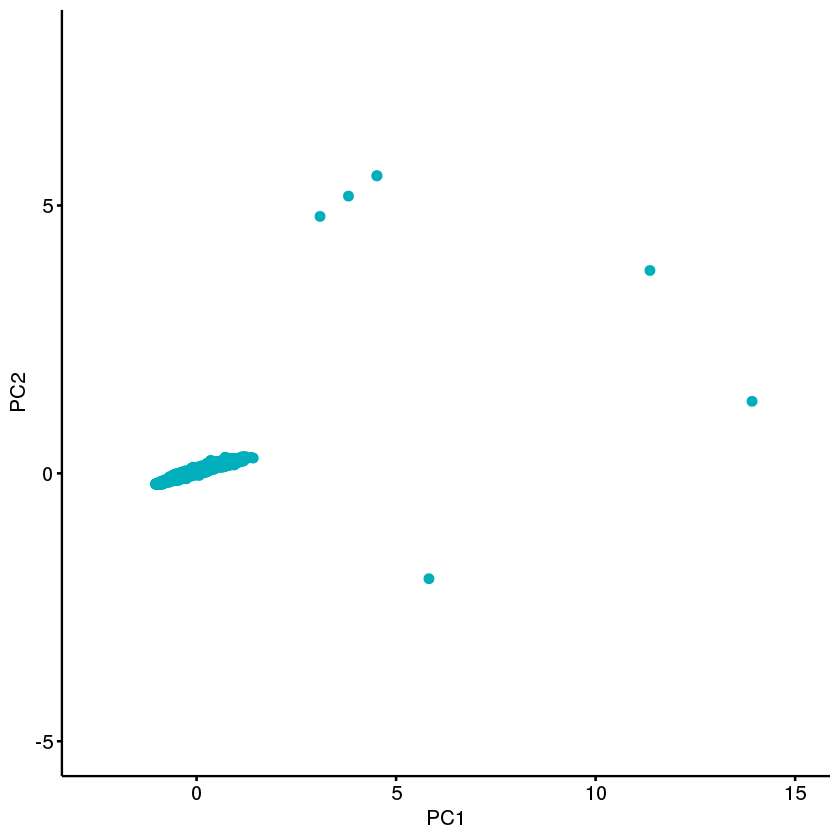

In [14]:
onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")+ ylim(-5, 8) + xlim(-2.5, 15)

onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")+ ylim(-5, 8) + xlim(-2.5, 15)

Using  as id variables



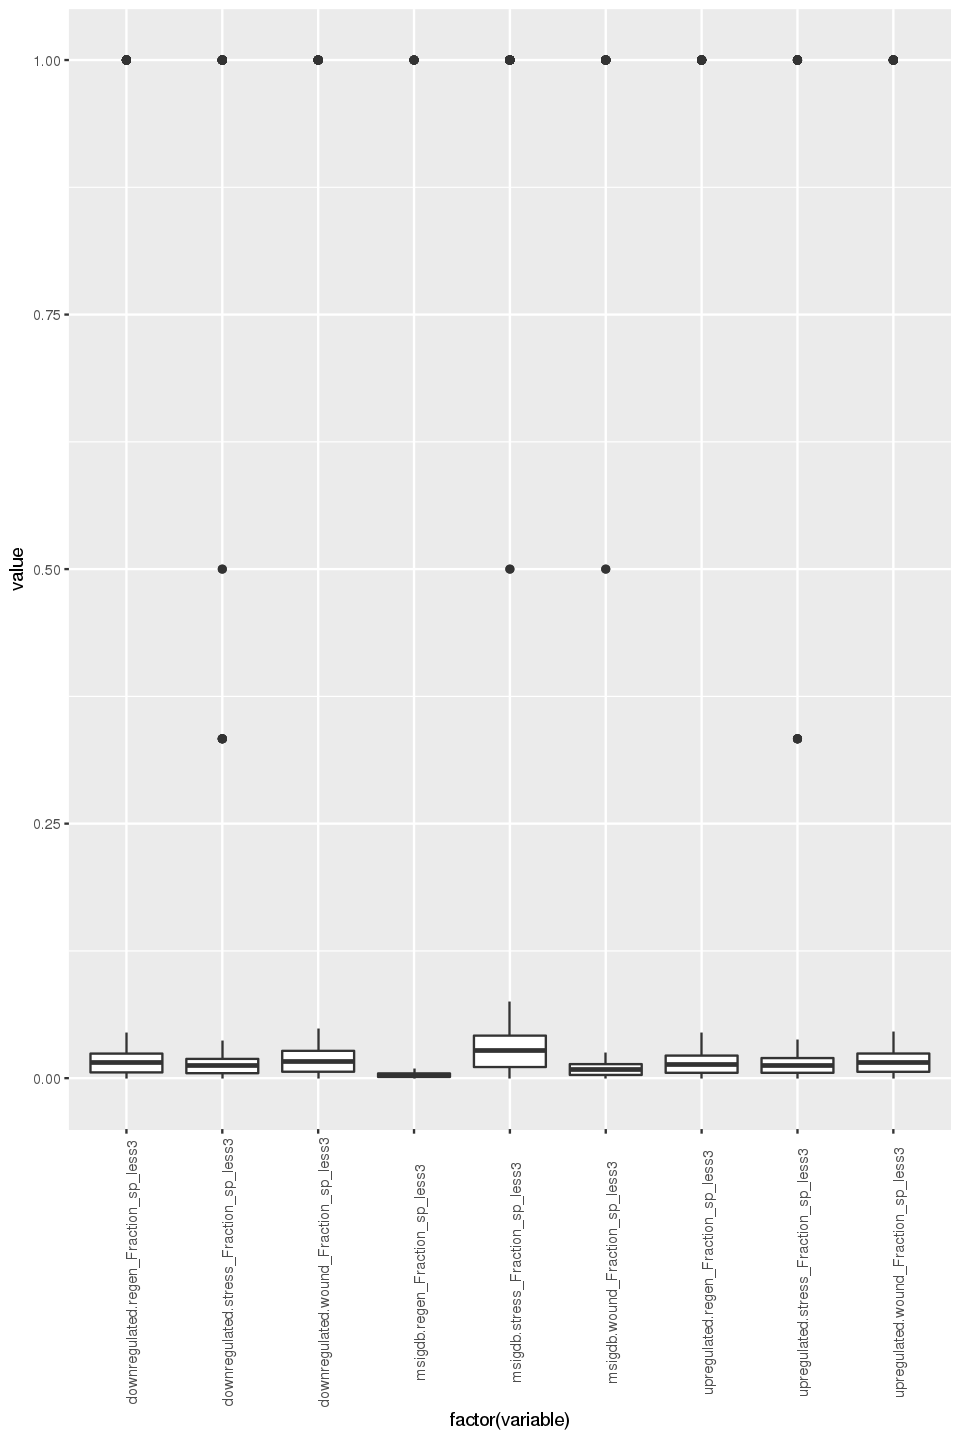

In [15]:
# fractions distributed
options(repr.plot.width=8, repr.plot.height=12)
meltData <- melt(data.frame(scale_exp))
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables

Using  as id variables



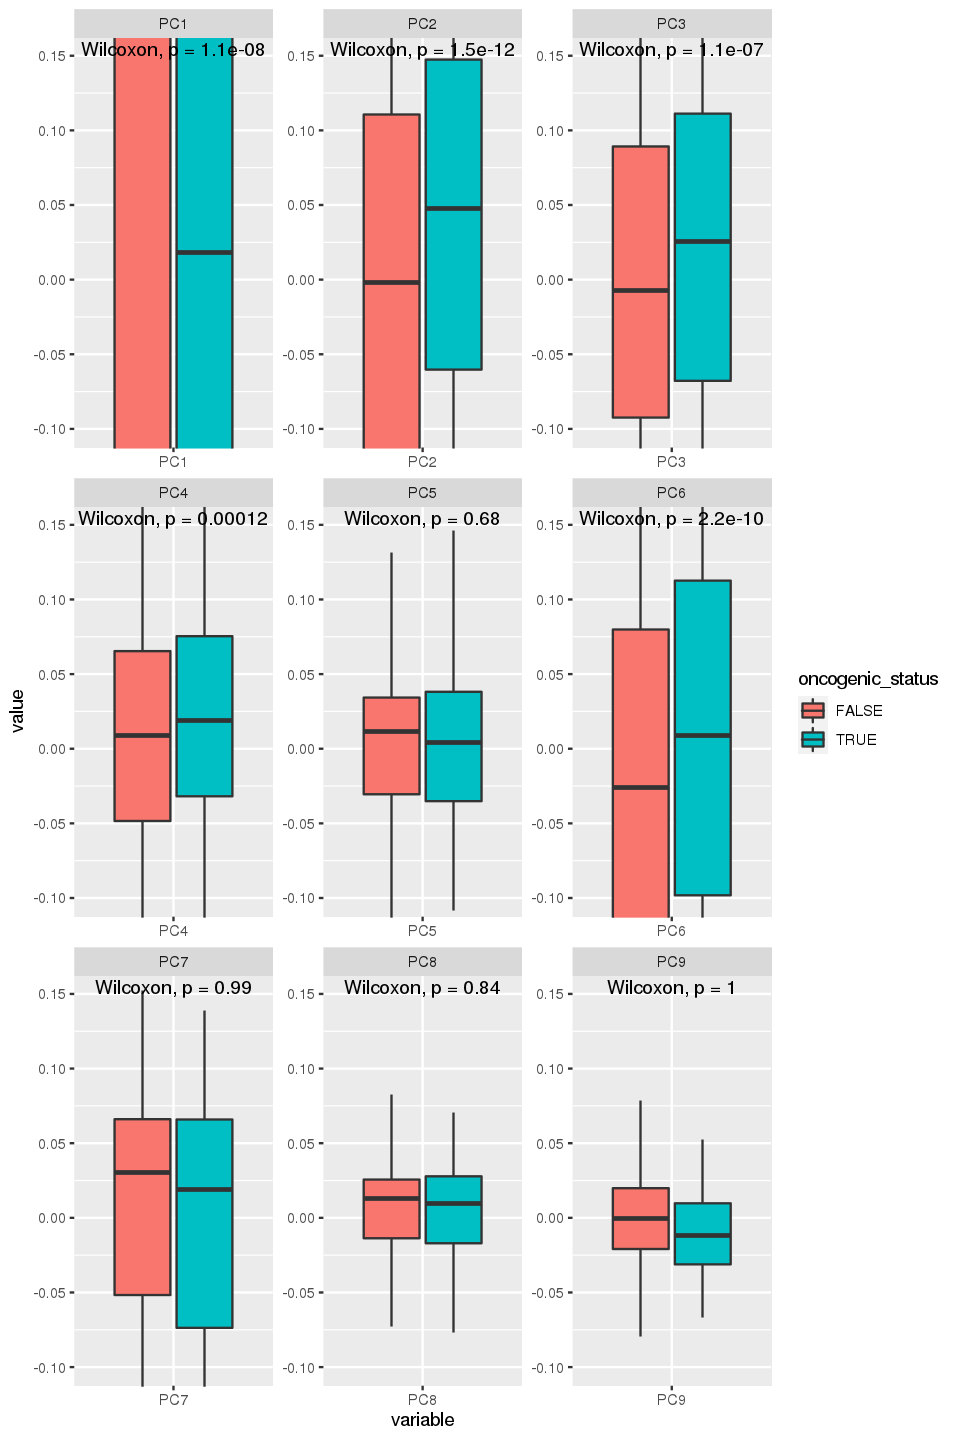

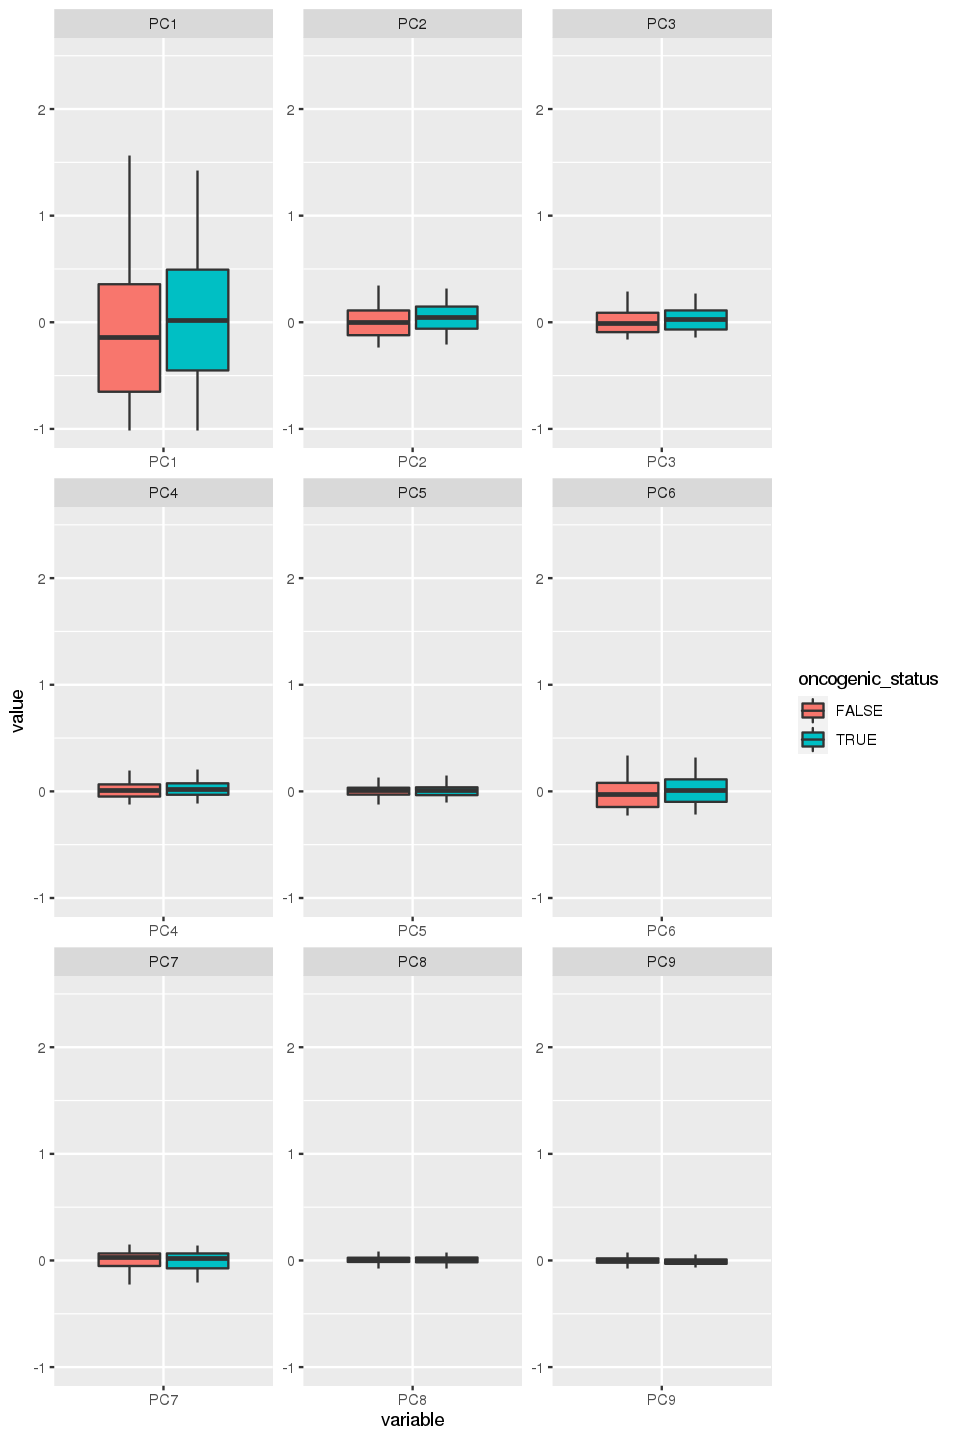

In [16]:
# pca distribution (zoomed in for smaller values)
options(repr.plot.width=8, repr.plot.height=12)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-.1, .15)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .15)

# pca distribution (zoomed out for PC1)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-1, 2.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -2.5)

Using  as id variables



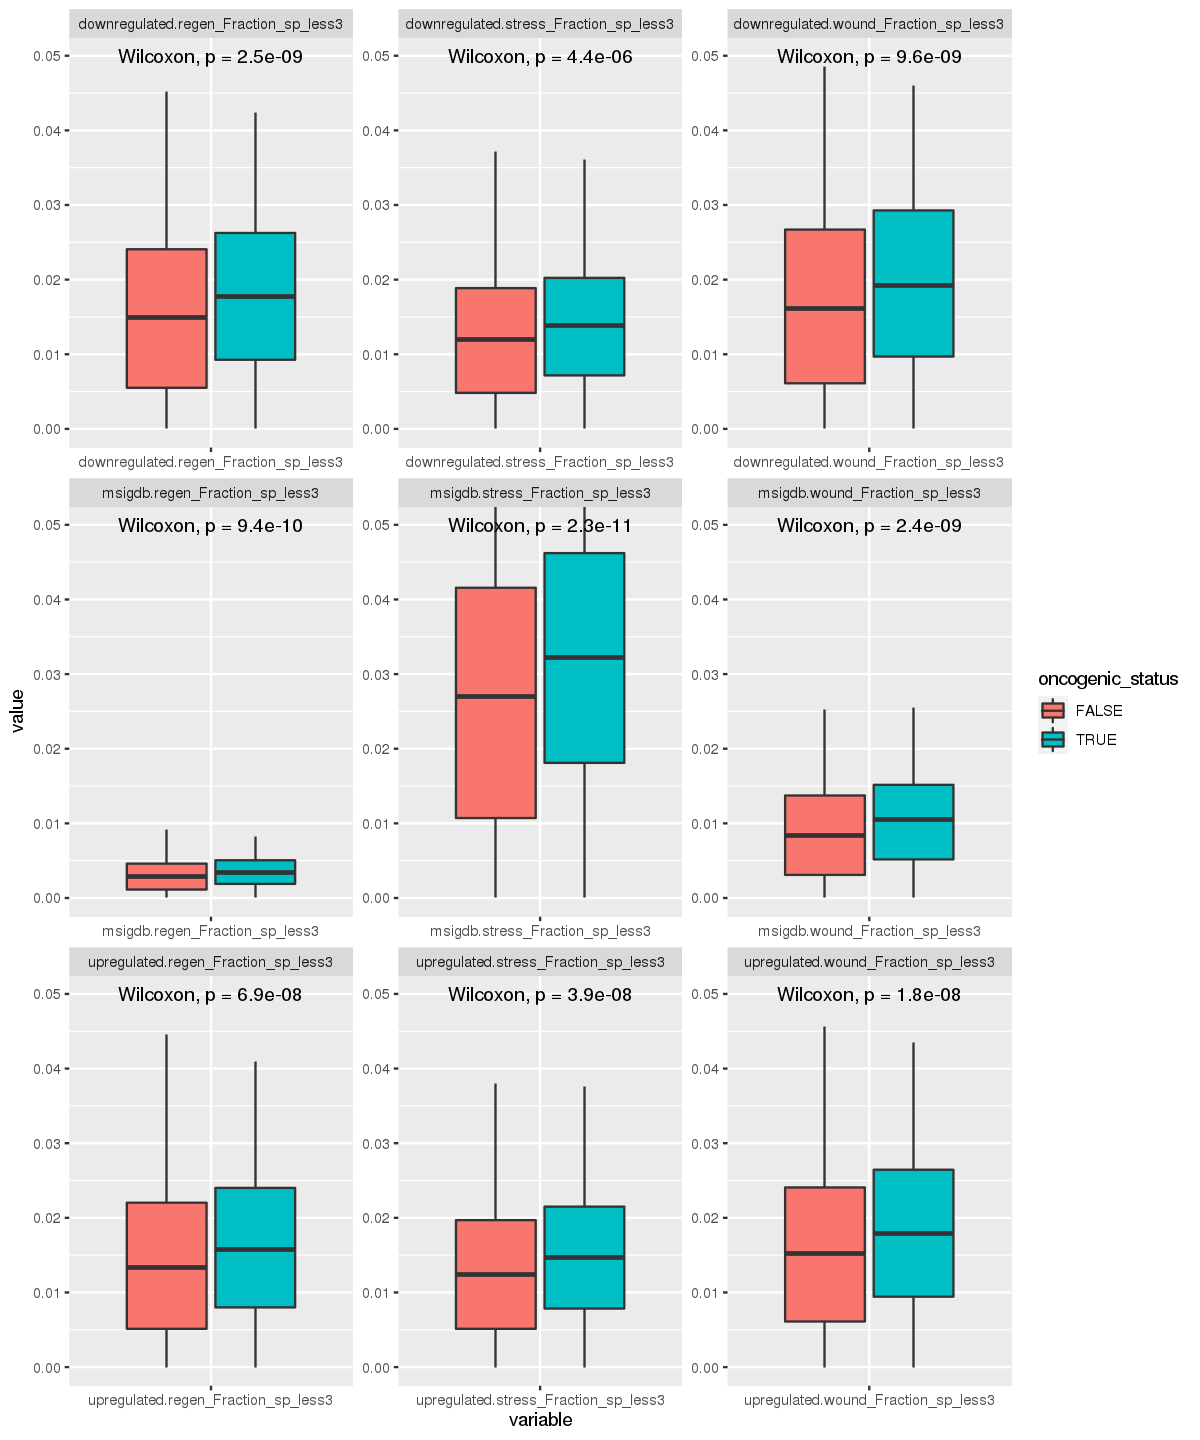

In [17]:
# fractions  distribution  oncogenic vs non (zooed in)
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(scale_exp)))

ggplot(pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .05)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .049)

Using  as id variables



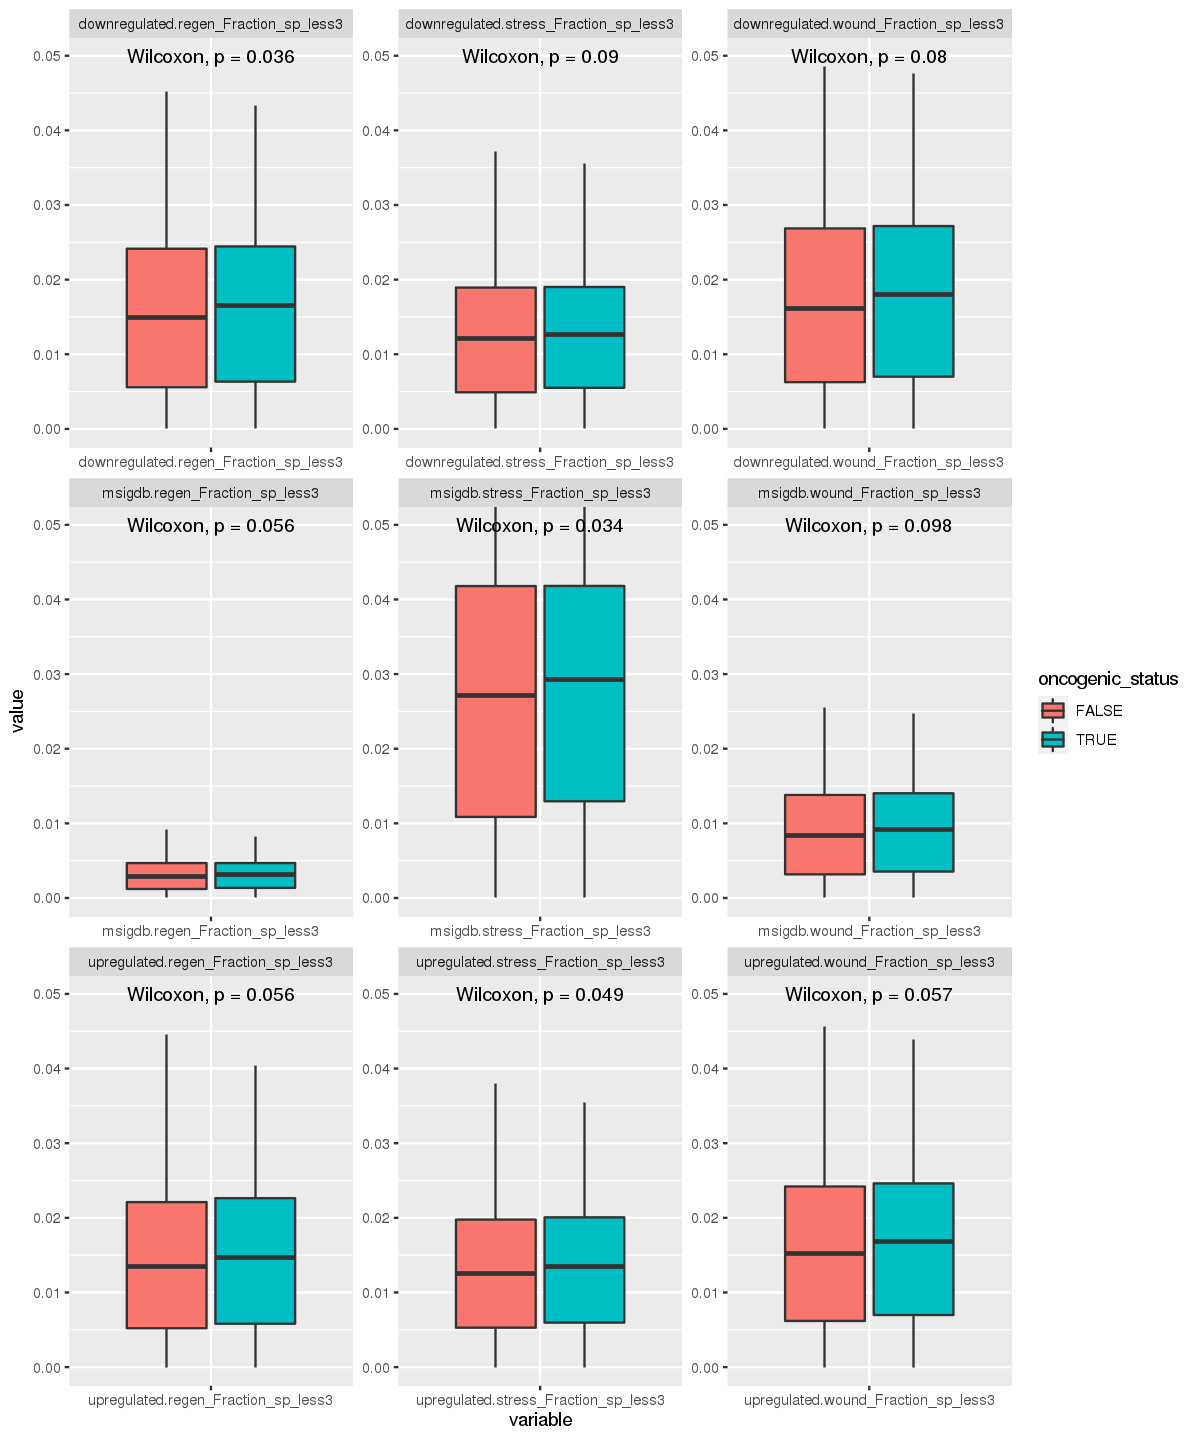

In [18]:
# random test
options(repr.plot.width=10, repr.plot.height=12)
random_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(sample(fractions_combinedDF_EXP$oncogenic_status), ncol(scale_exp)))

ggplot(random_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .05)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .049)

Using  as id variables



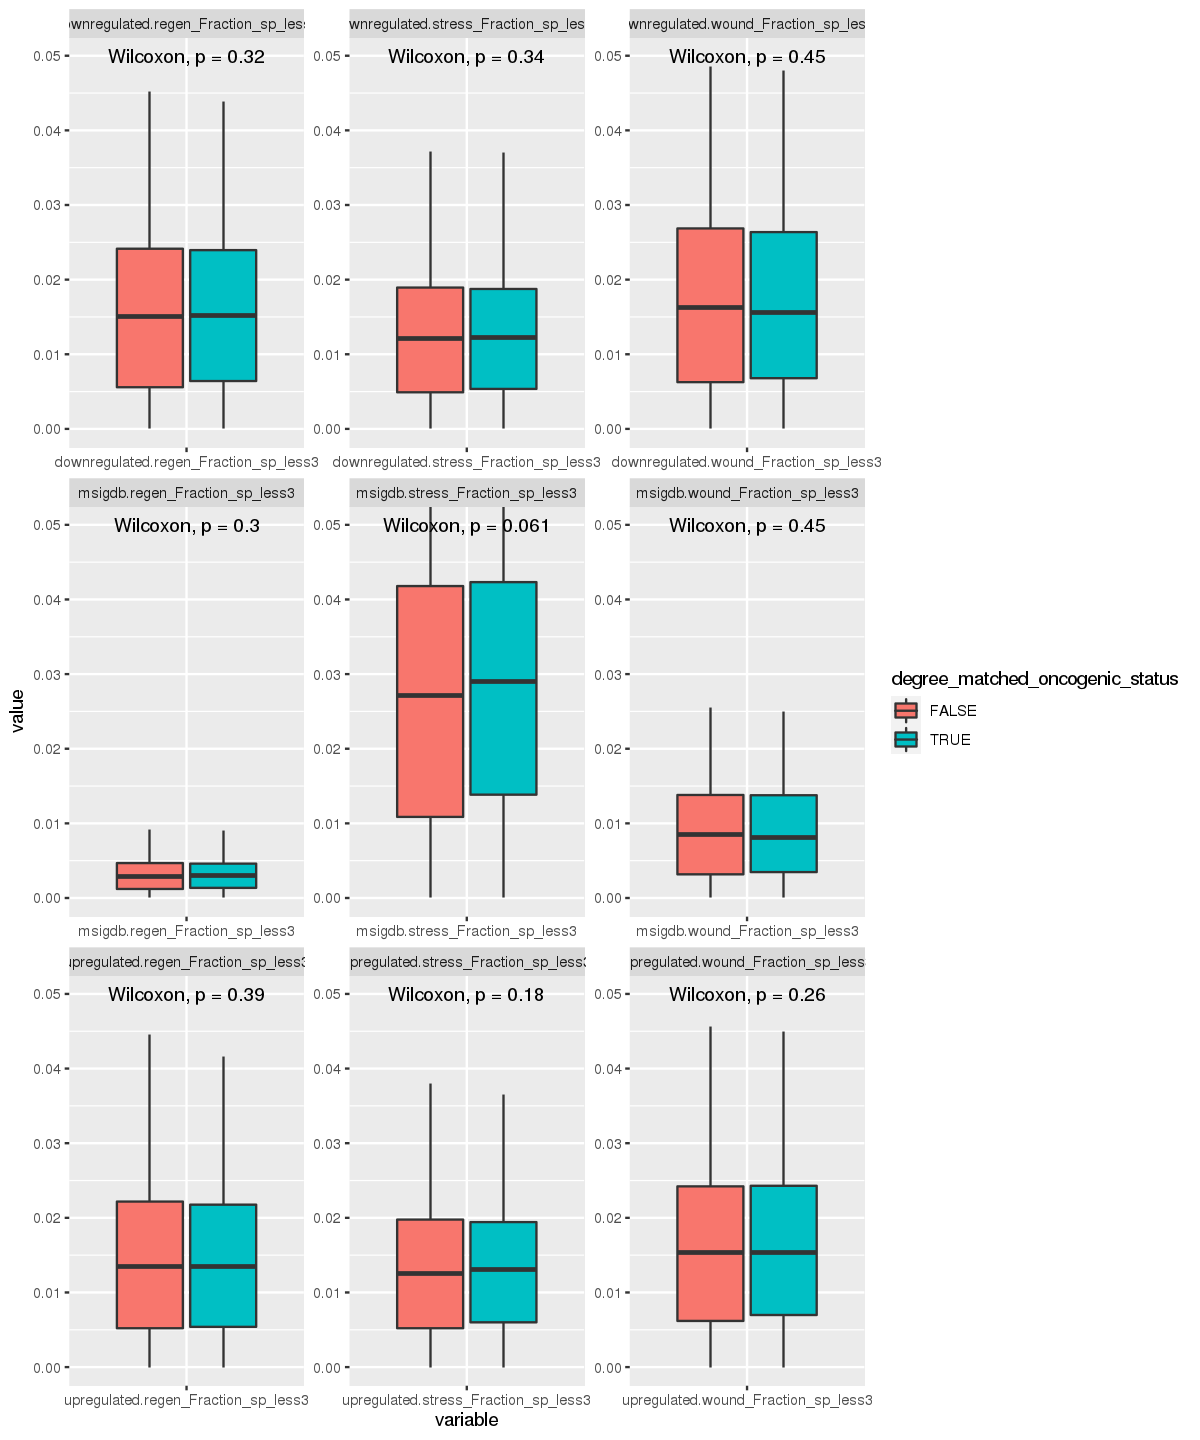

In [19]:
# degree matched
options(repr.plot.width=10, repr.plot.height=12)
degree_matched_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_EXP$degree_matched_oncogenic_status, ncol(scale_exp)))

ggplot(degree_matched_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .05)) +
stat_compare_means(aes(group = degree_matched_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = 0.049)

Using  as id variables



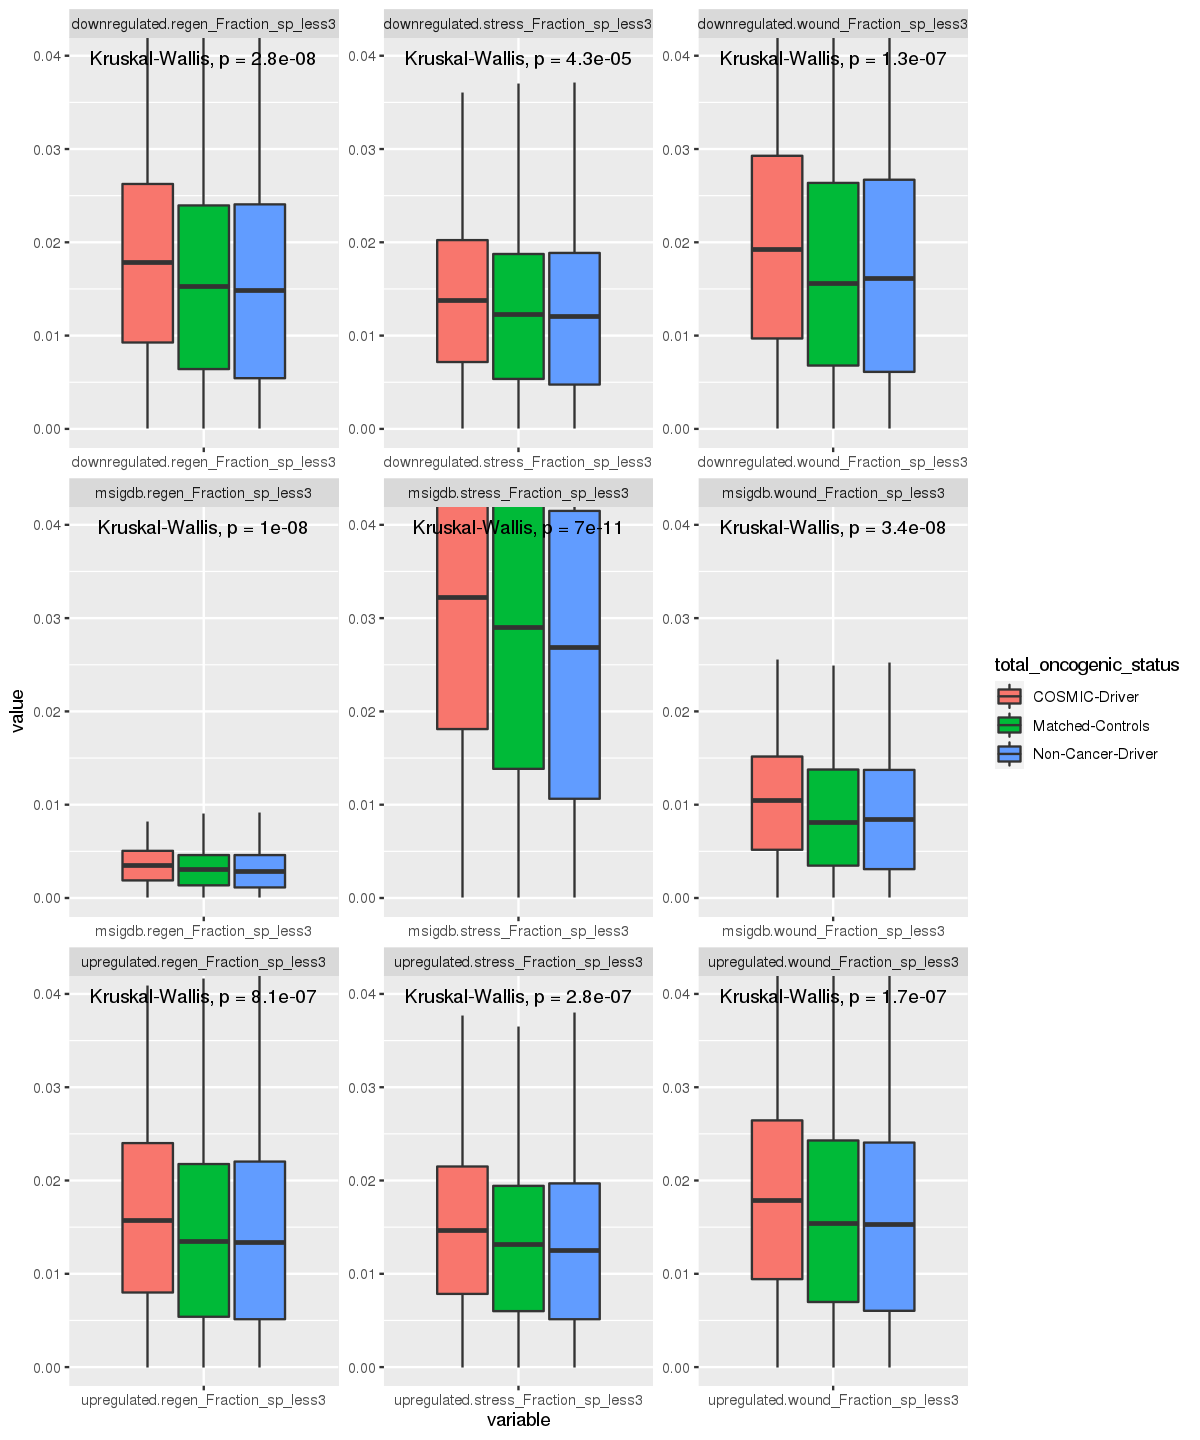

In [20]:
# 3 measures
options(repr.plot.width=10, repr.plot.height=12)
triple_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "total_oncogenic_status" = rep(fractions_combinedDF_EXP$total_oncogenic_status, ncol(scale_exp)))

ggplot(triple_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .04)) +
stat_compare_means(aes(group = total_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = .039)

## convert these values into auroc and check the values

In [21]:
library(caTools)
labels <- as.factor(triple_pca_melted_exp4_raw$total_oncogenic_status)
print(table(triple_pca_melted_exp4_raw$total_oncogenic_status))
levels(labels) <- c(1,0,0)
print(table(labels))
total_auroc <- data.frame("fractions" = triple_pca_melted_exp4_raw$value, labels)
colAUC(total_auroc$fractions, total_auroc$labels, plotROC=FALSE, alg=c("Wilcoxon","ROC"))

# try again with the threshhold of 3


    COSMIC-Driver  Matched-Controls Non-Cancer-Driver 
             6084              5283            114543 
labels
     1      0 
  6084 119826 


1 vs. 0,0.5559348


# Species Experiment Type

 ## PCA < 4

### Upregulated

In [83]:
cols <- colnames(fractions_combinedDF_SPEC_EXP)[grep("up_Fraction_sp_less4",colnames(fractions_combinedDF_SPEC_EXP))]
colnames(fractions_combinedDF_SPEC_EXP[,..cols])

ERROR: Error in is.data.frame(x): object 'fractions_combinedDF_SPEC_EXP' not found


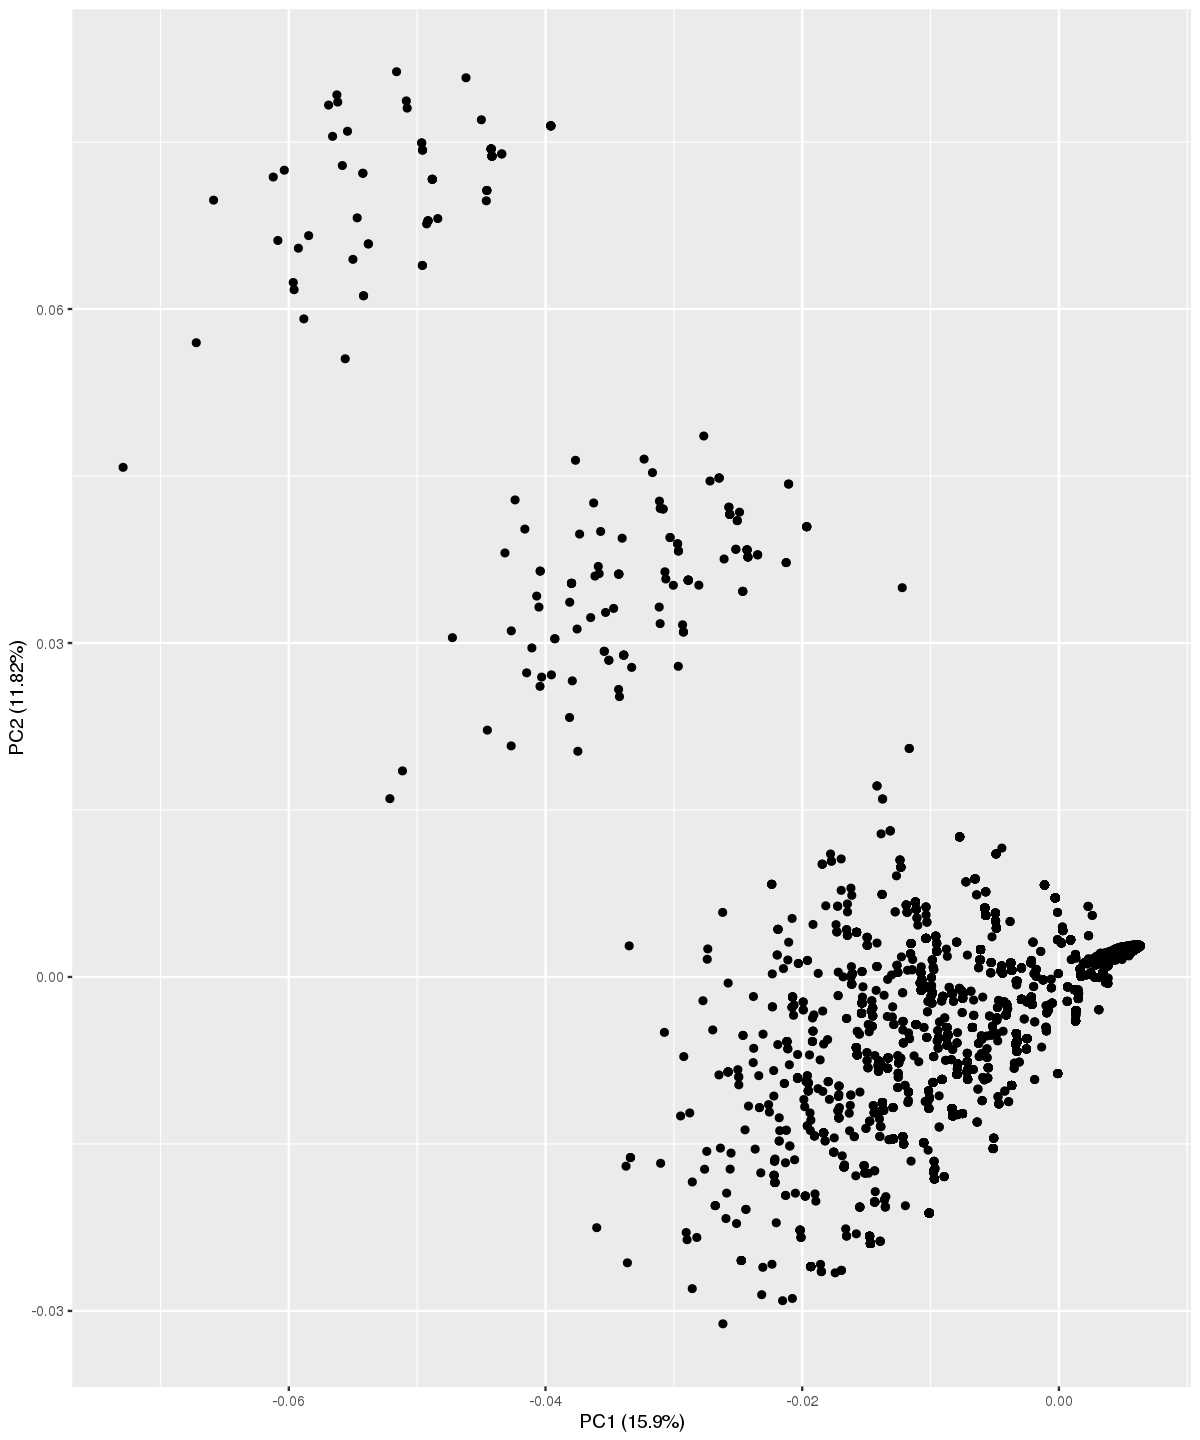

Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


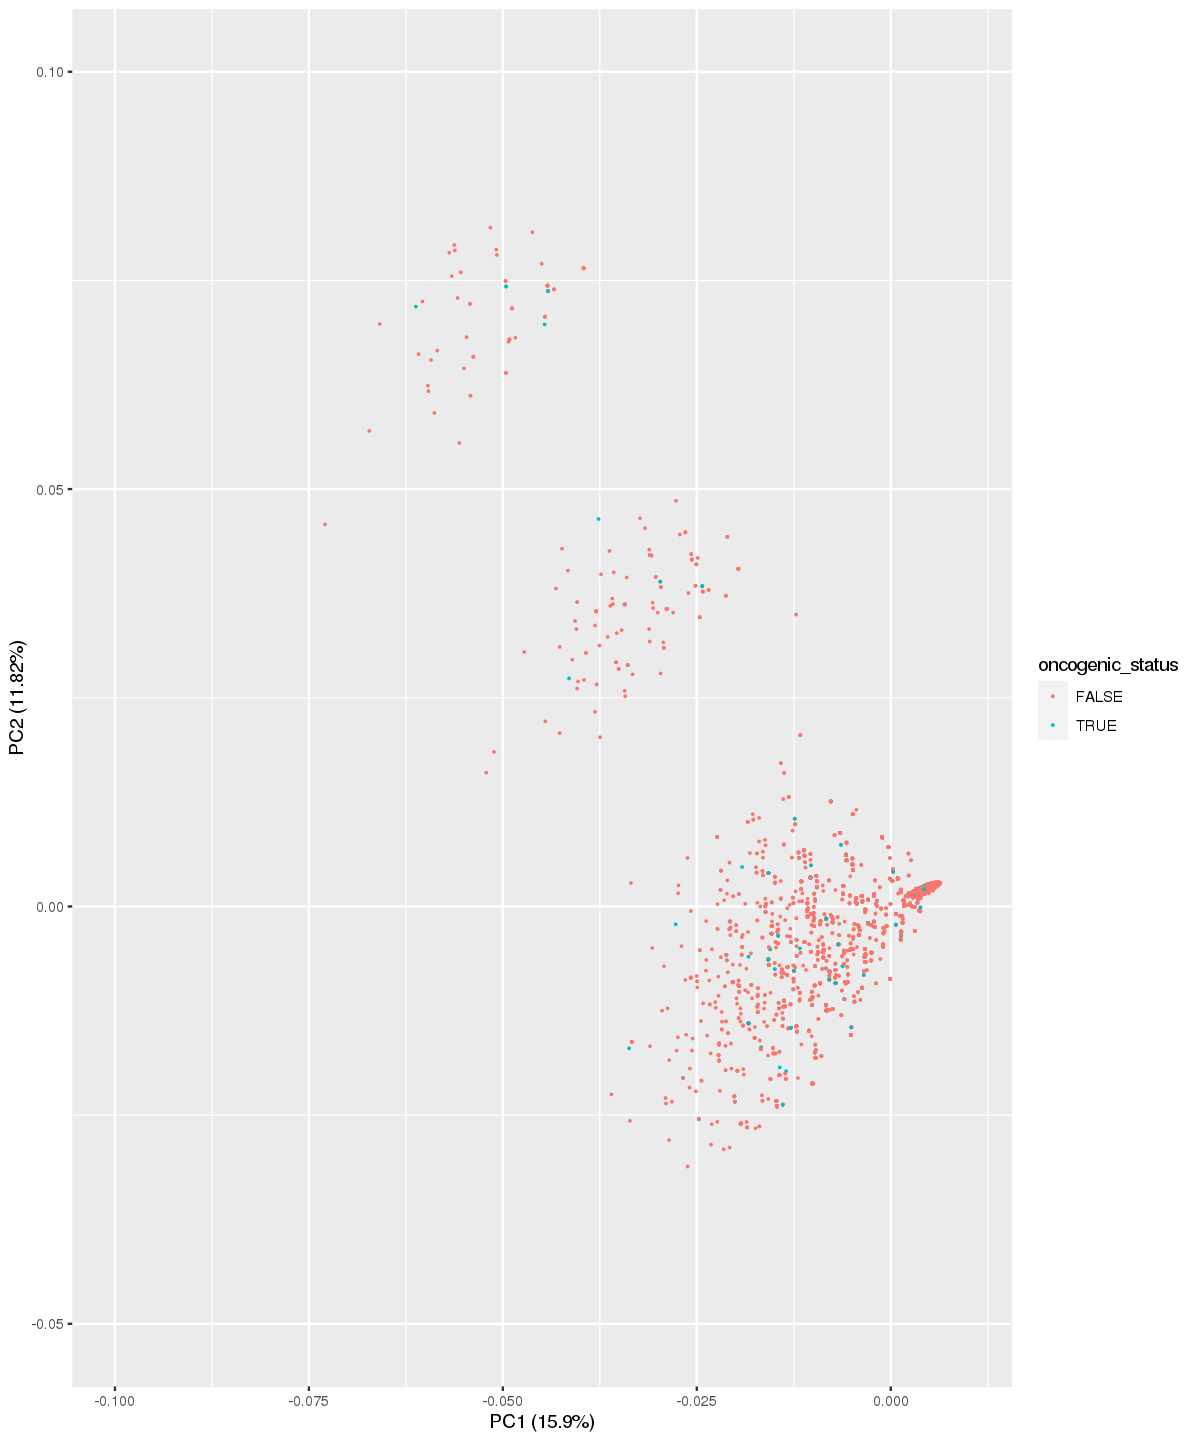

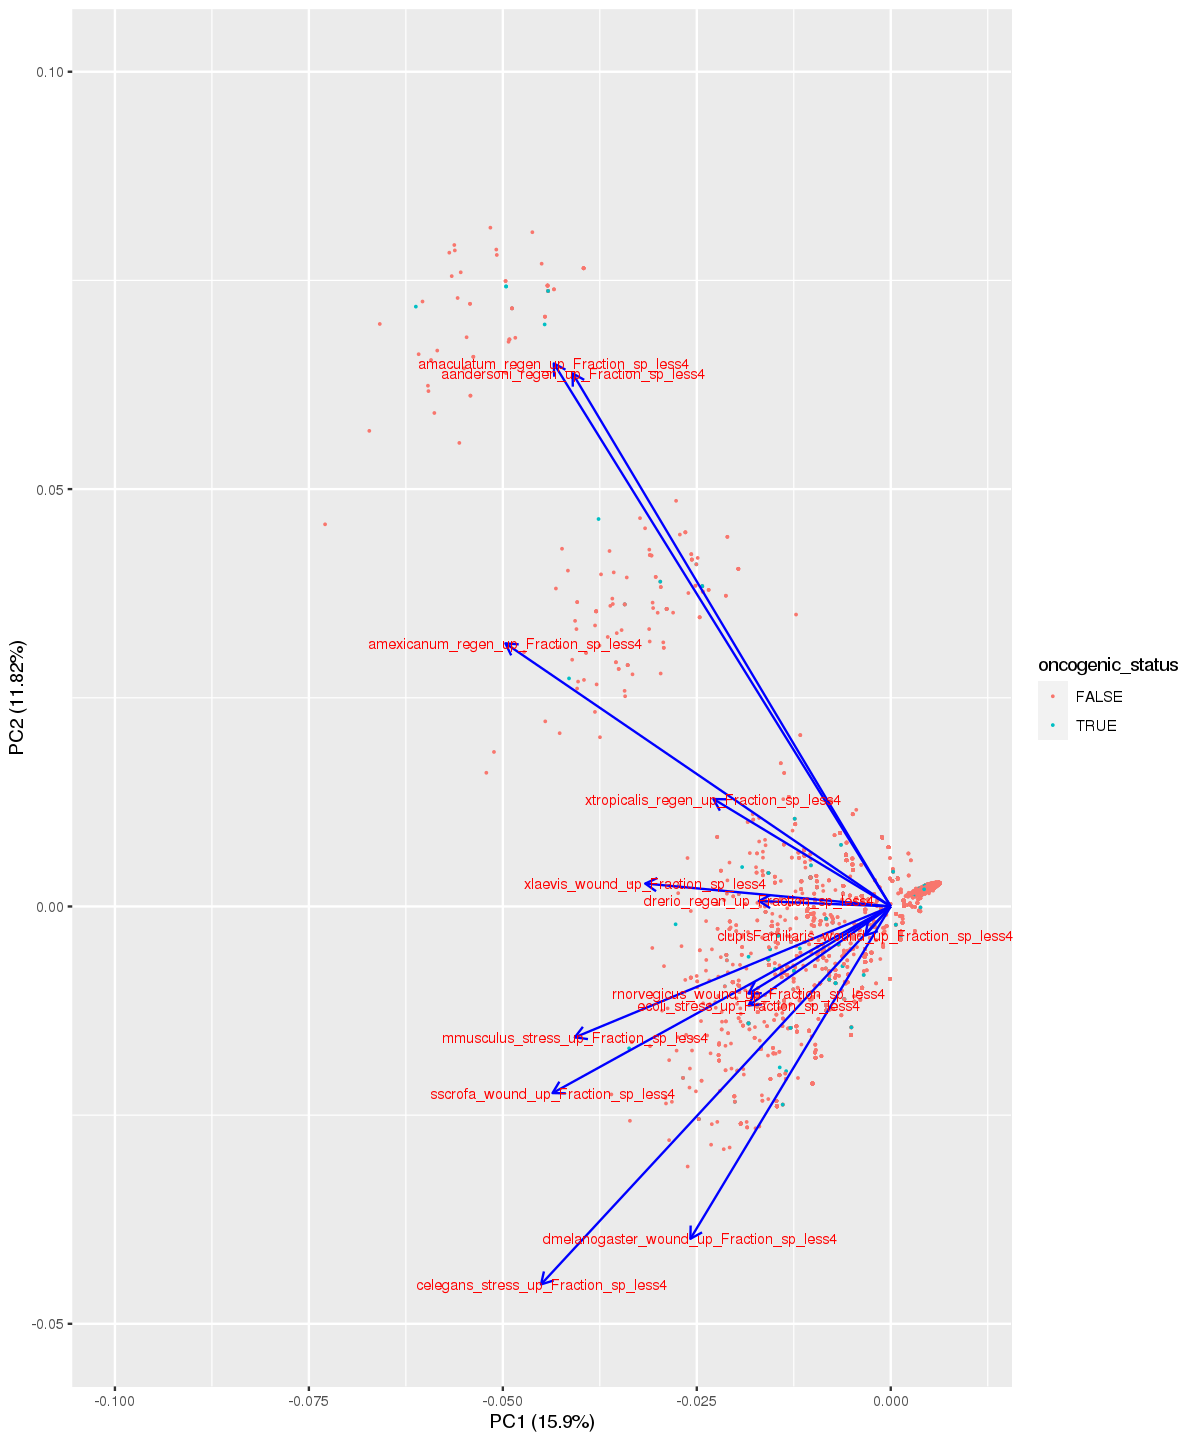

In [44]:
options(repr.plot.width=10, repr.plot.height=12)
scale_spec_exp <- fractions_combinedDF_SPEC_EXP[,..cols]
pca_res_spec_exp <- prcomp(scale_spec_exp, scale. = TRUE)
autoplot(pca_res_spec_exp)
autoplot(pca_res_spec_exp, data = fractions_combinedDF_SPEC_EXP,
         colour = 'oncogenic_status', size = .01) + ylim(-.05, .1) + xlim(-.1, .01)

autoplot(pca_res_spec_exp, data = fractions_combinedDF_SPEC_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,
         size = .01) + ylim(-.05, .1) + xlim(-.1, .01)

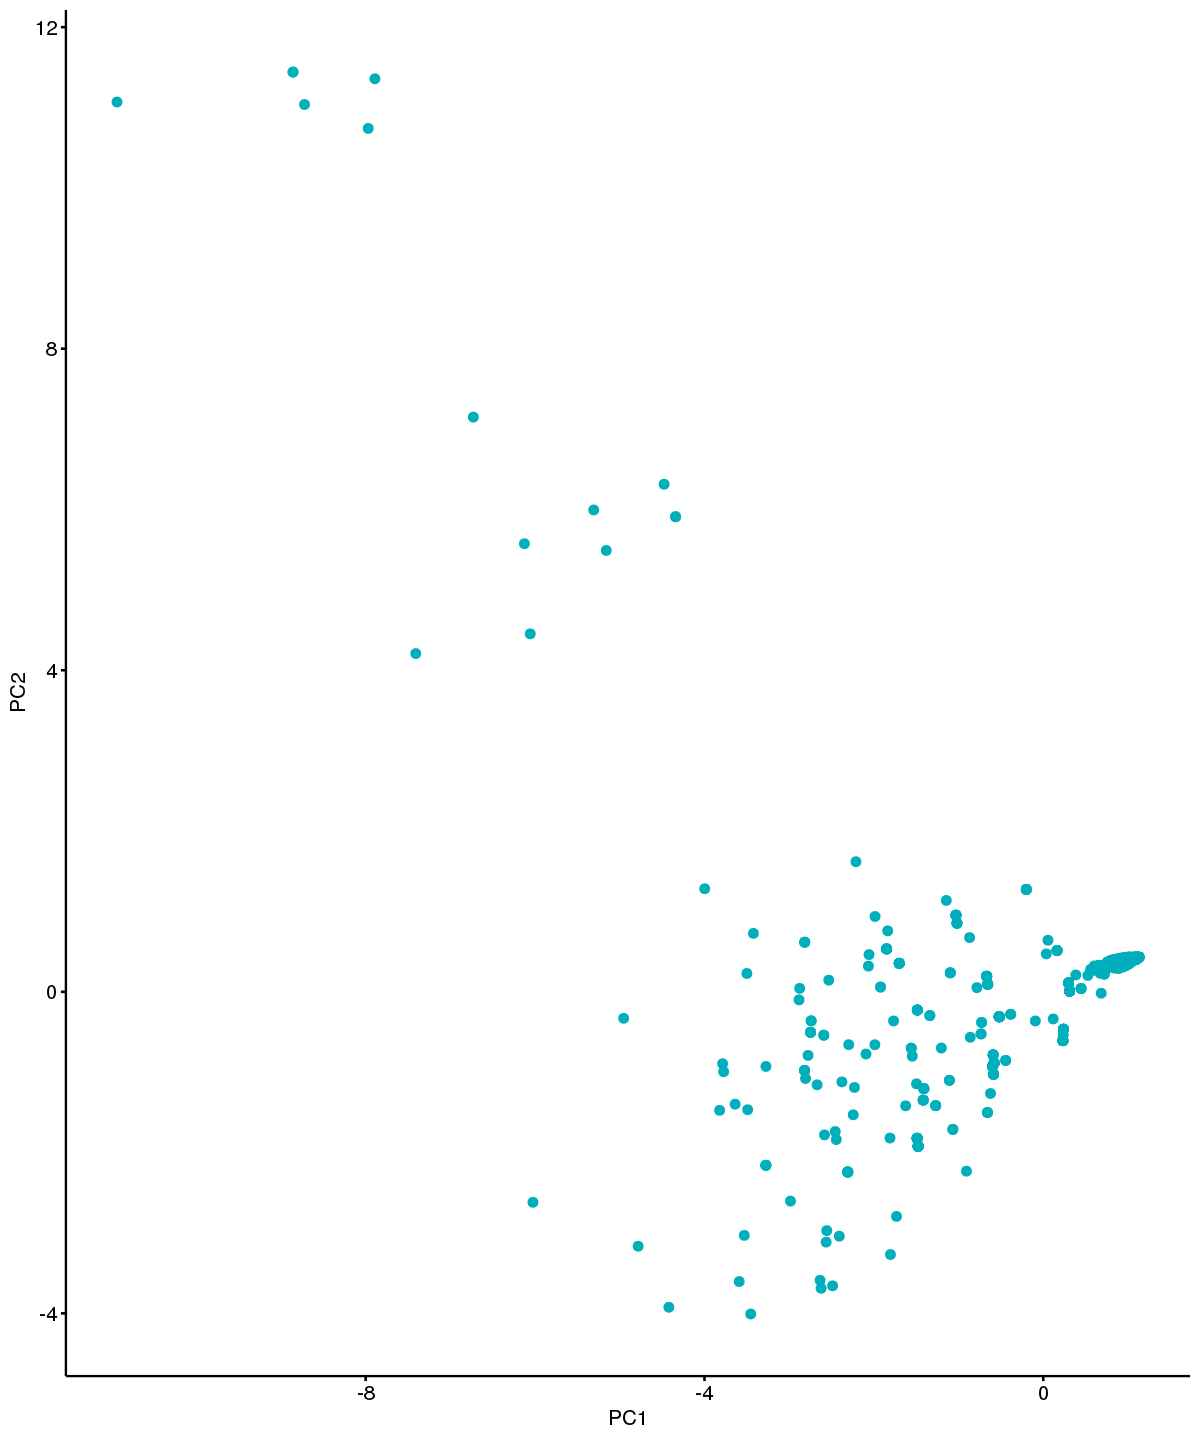

Warning message:
“Removed 9 rows containing missing values (geom_point).”


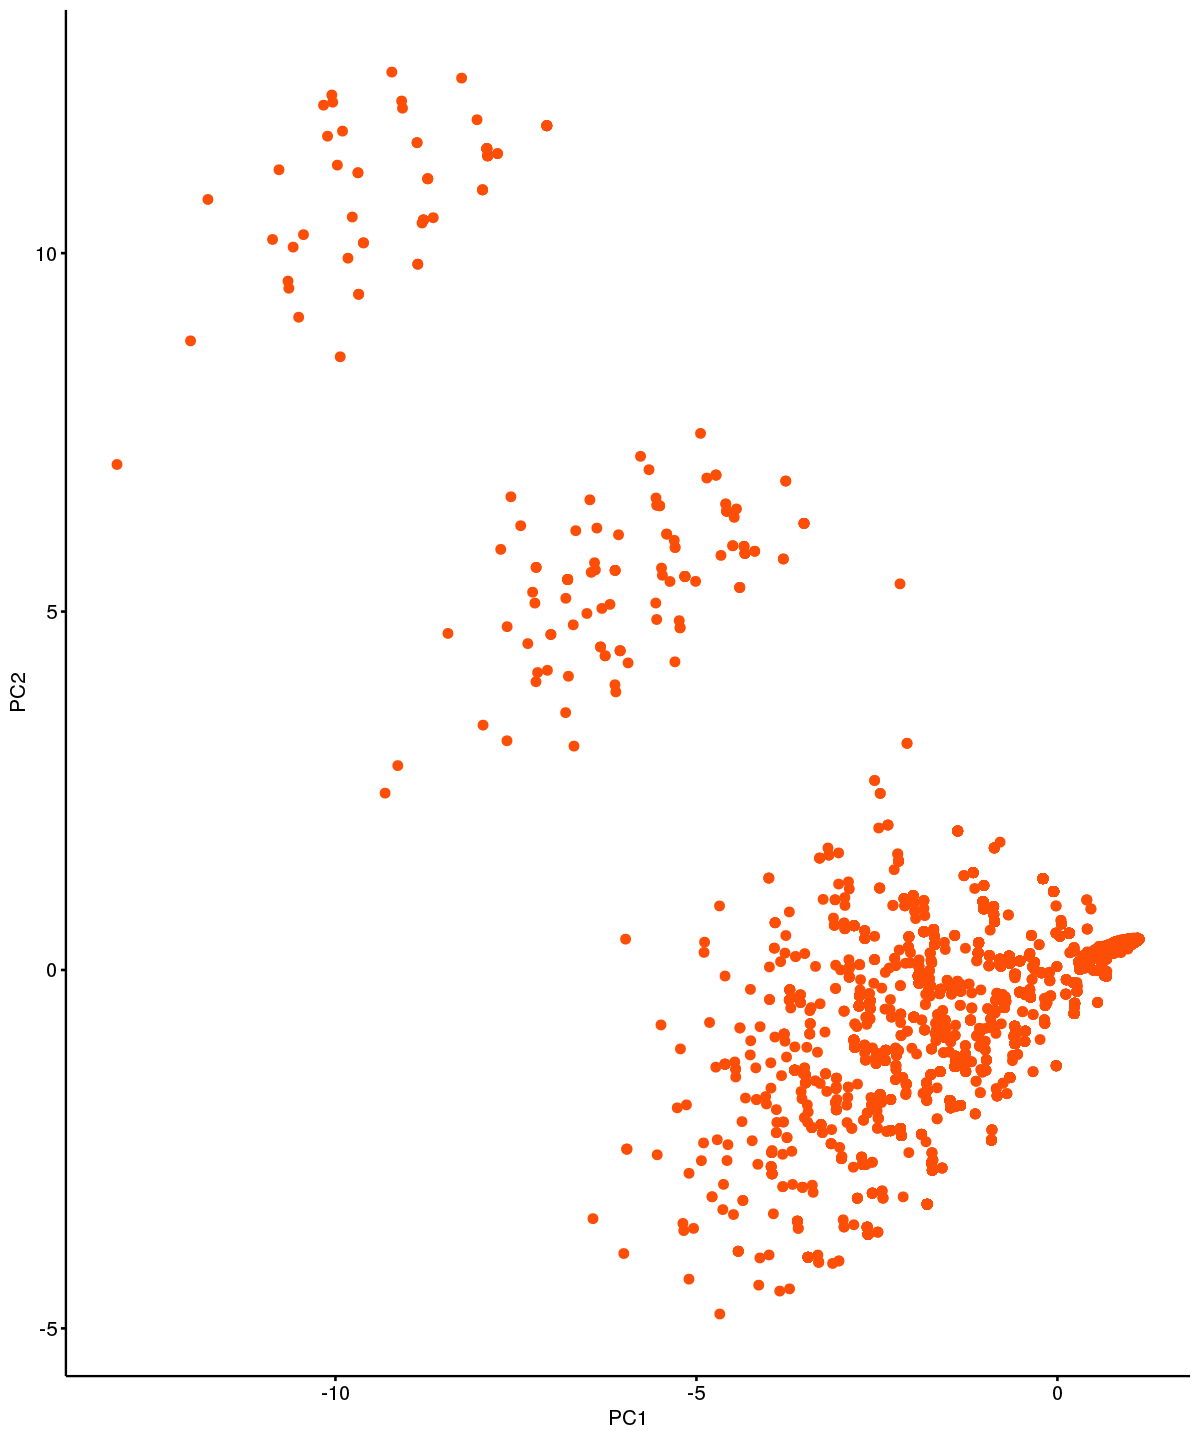

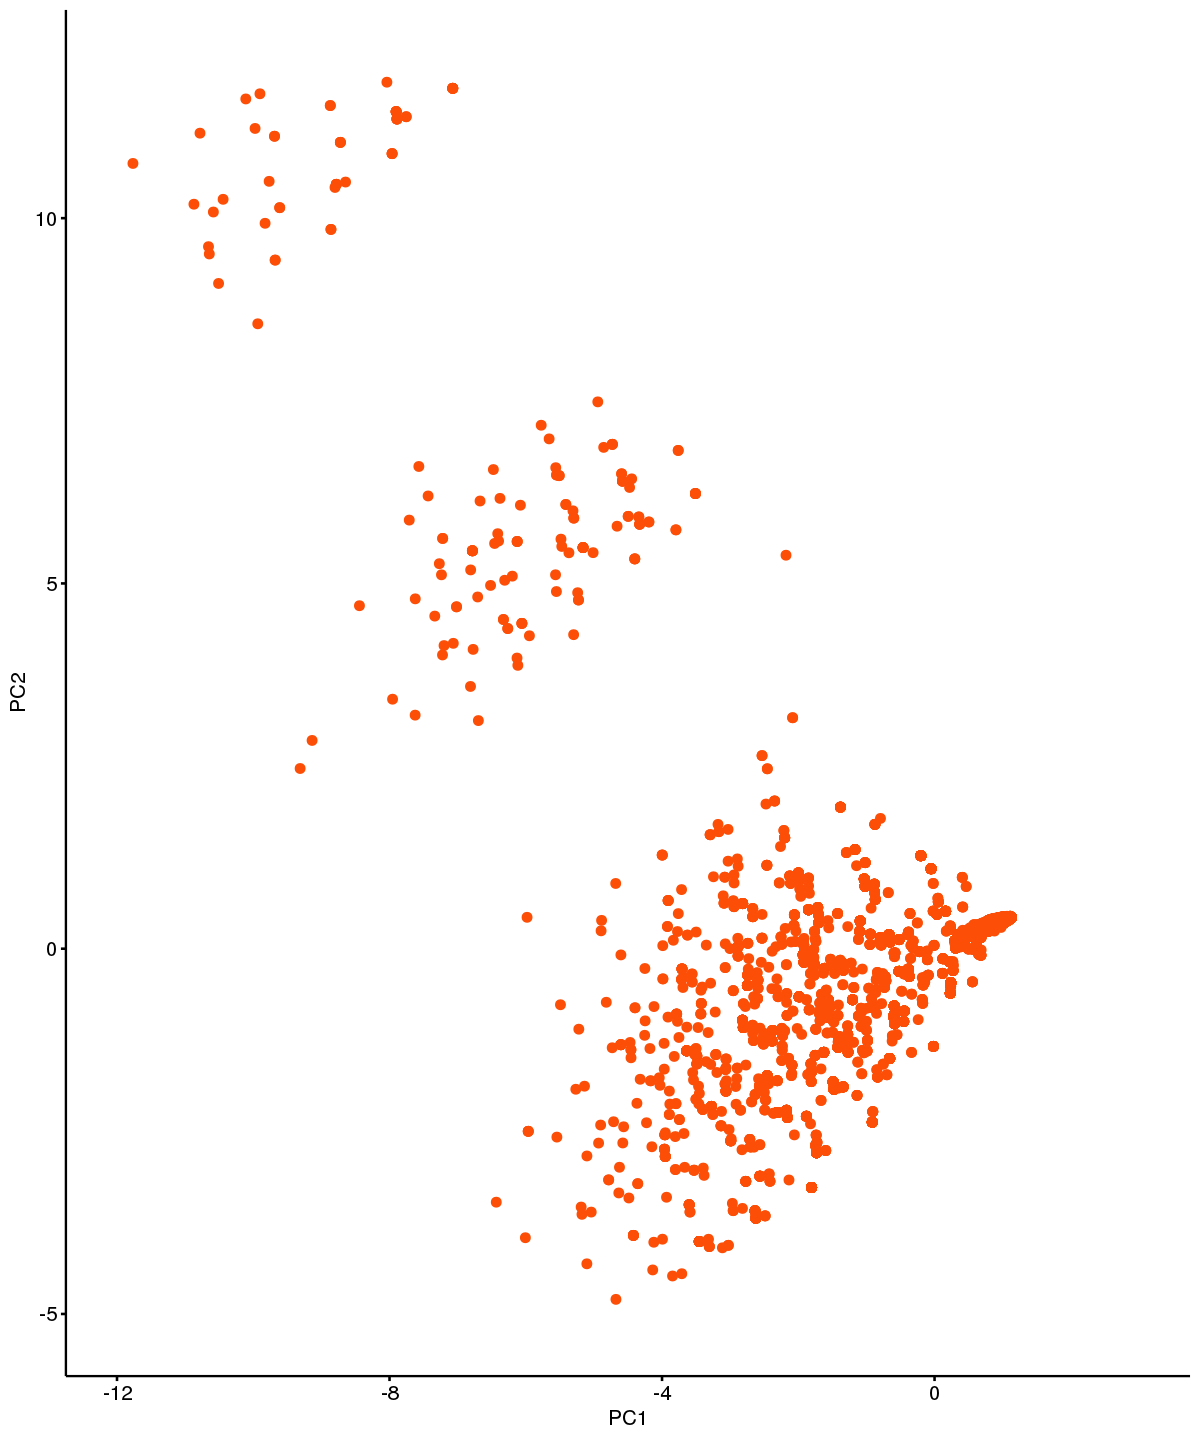

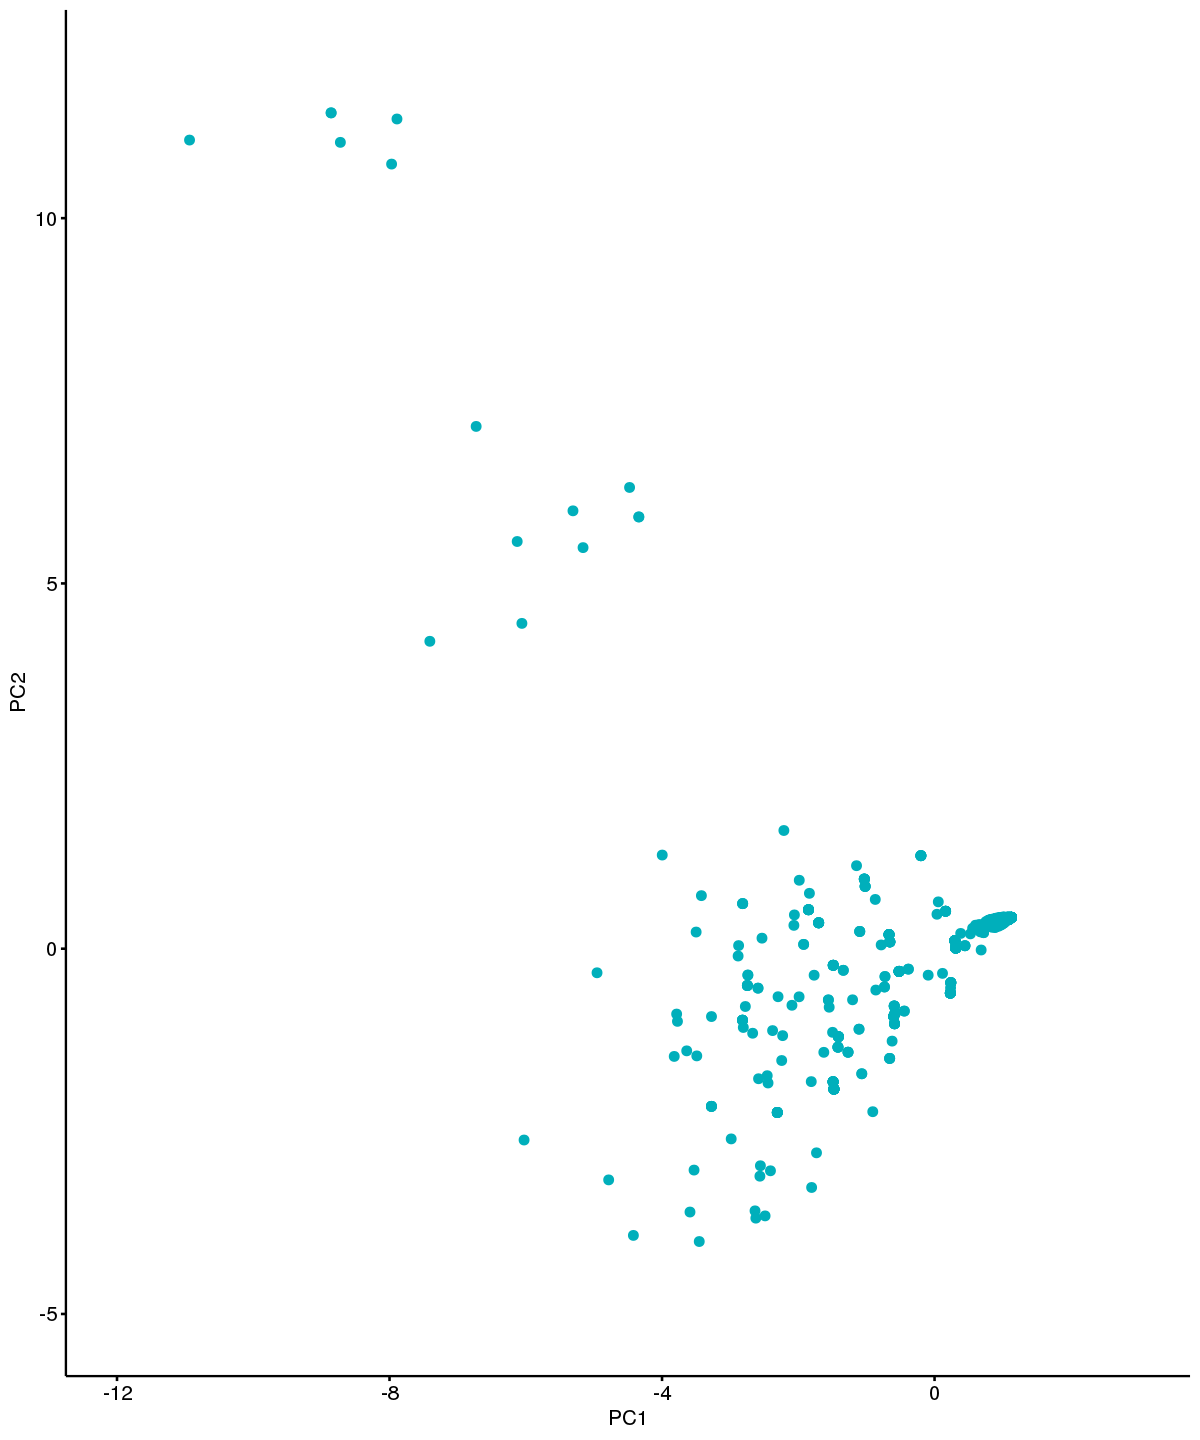

In [47]:
options(repr.plot.width=10, repr.plot.height=12)
onc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

nononc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")+ ylim(-5, 12) + xlim(-12, 3)

onc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")+ ylim(-5, 12) + xlim(-12, 3)

Using  as id variables



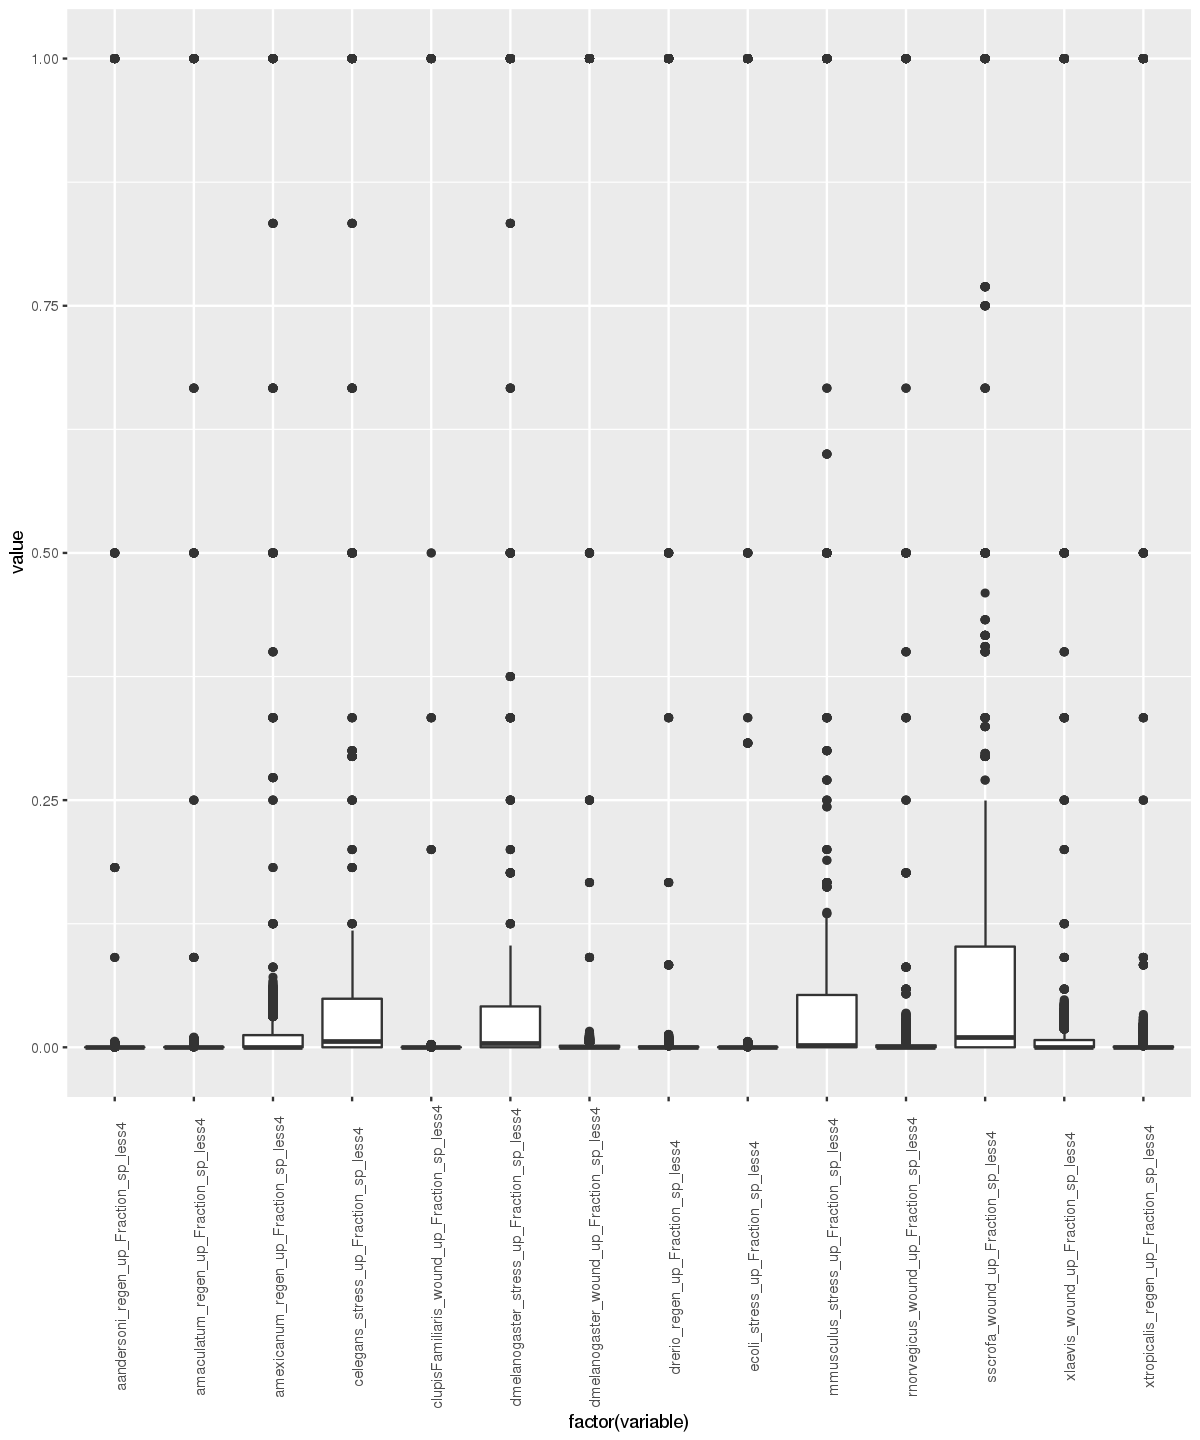

In [48]:
# fractions distributed
options(repr.plot.width=10, repr.plot.height=12)
meltData <- melt(data.frame(scale_spec_exp))
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables



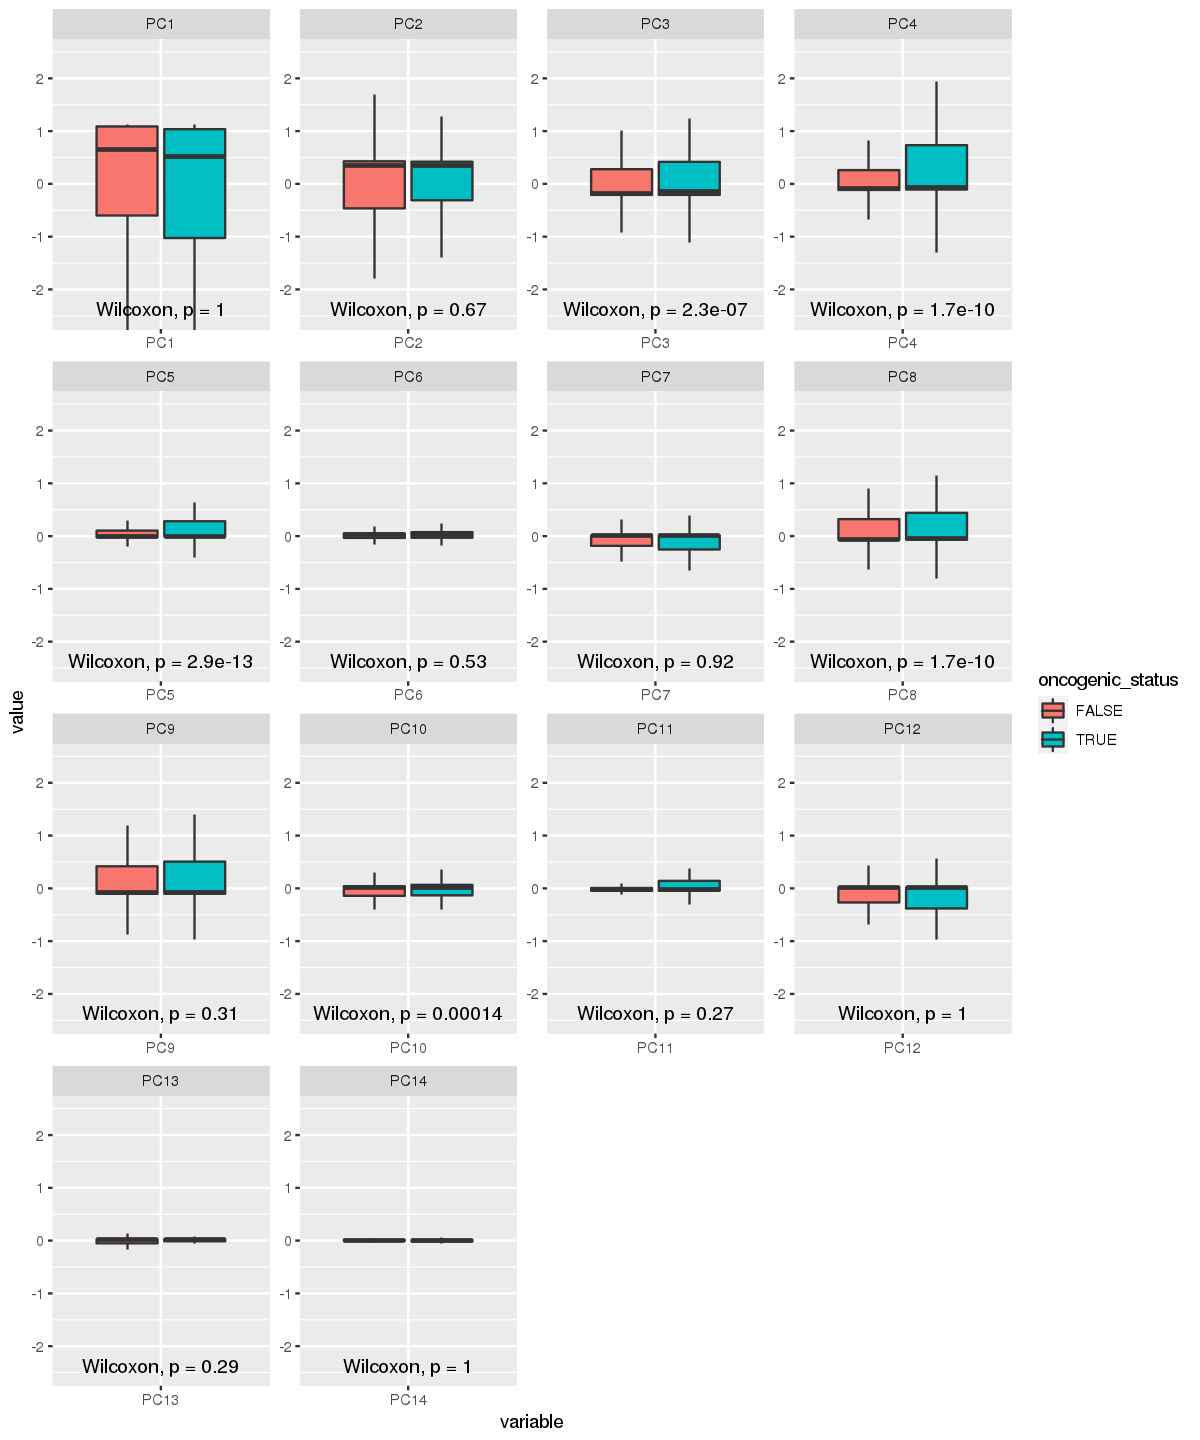

In [52]:
# pcca distribution
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_up4 <- cbind(melt(as.data.frame(pca_res_spec_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(pca_res_spec_exp$x)))

ggplot(pca_melted_up4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-2.5, 2.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -2.5)

Using  as id variables



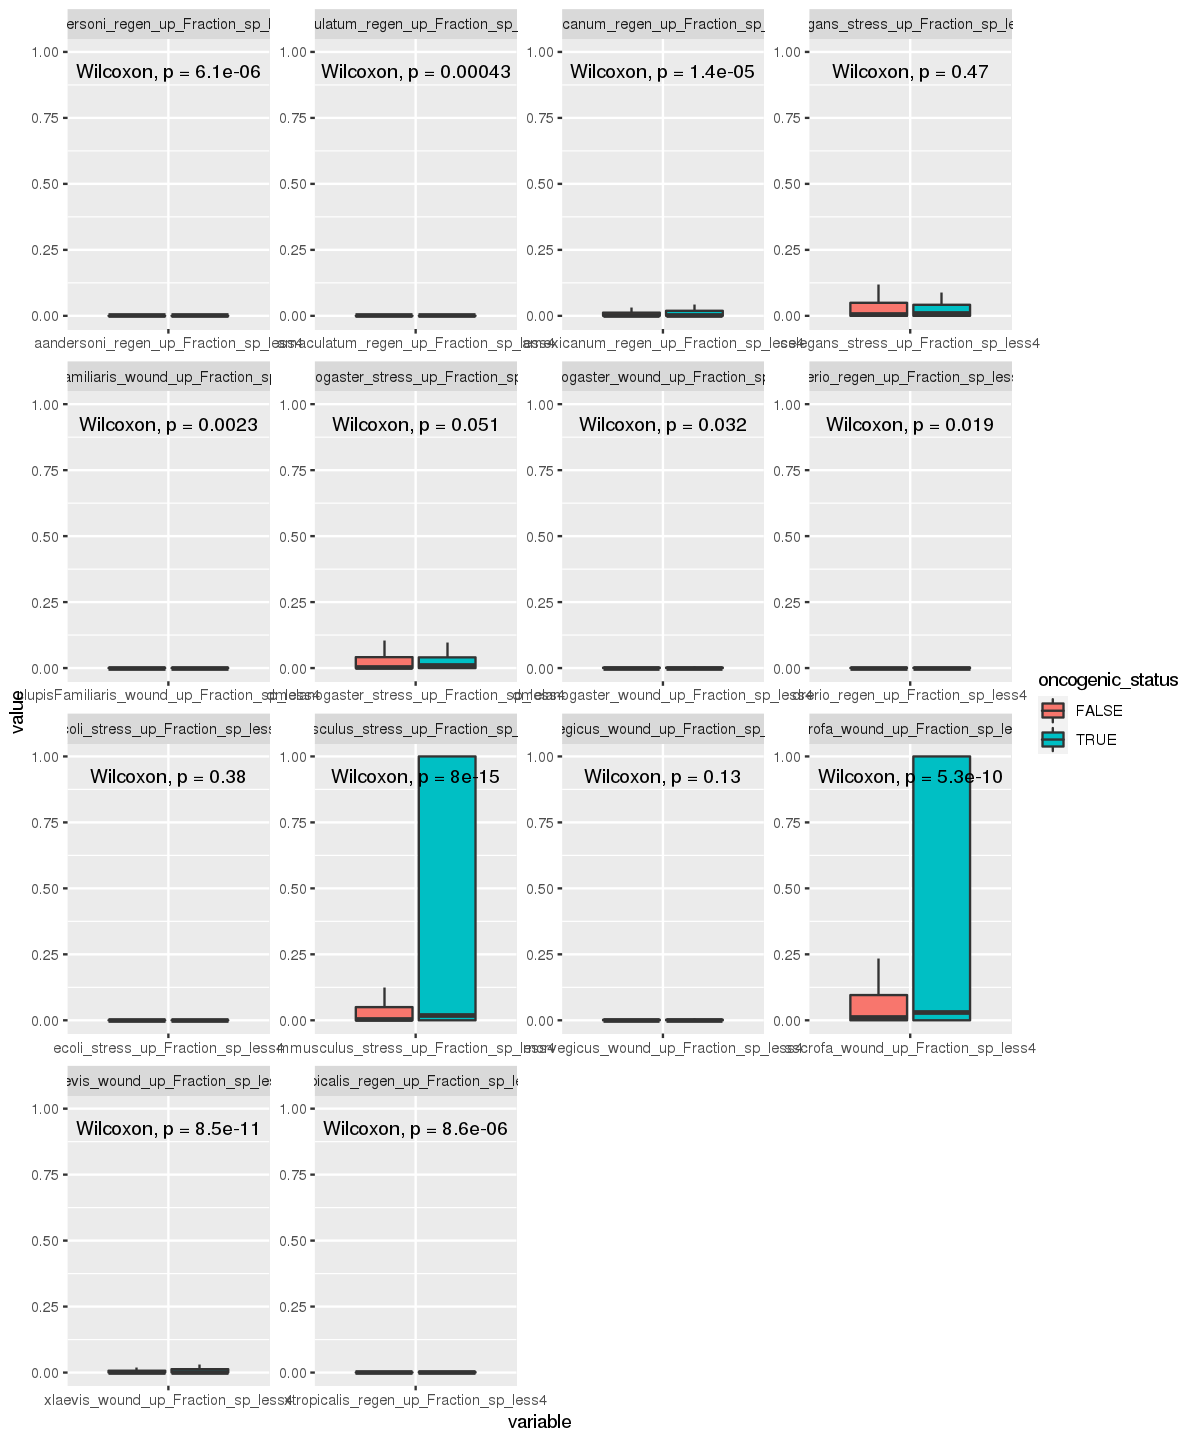

In [60]:
# fractions  distribution  oncogenic vs non
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(scale_spec_exp)))

ggplot(pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, 1)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .9)


Using  as id variables



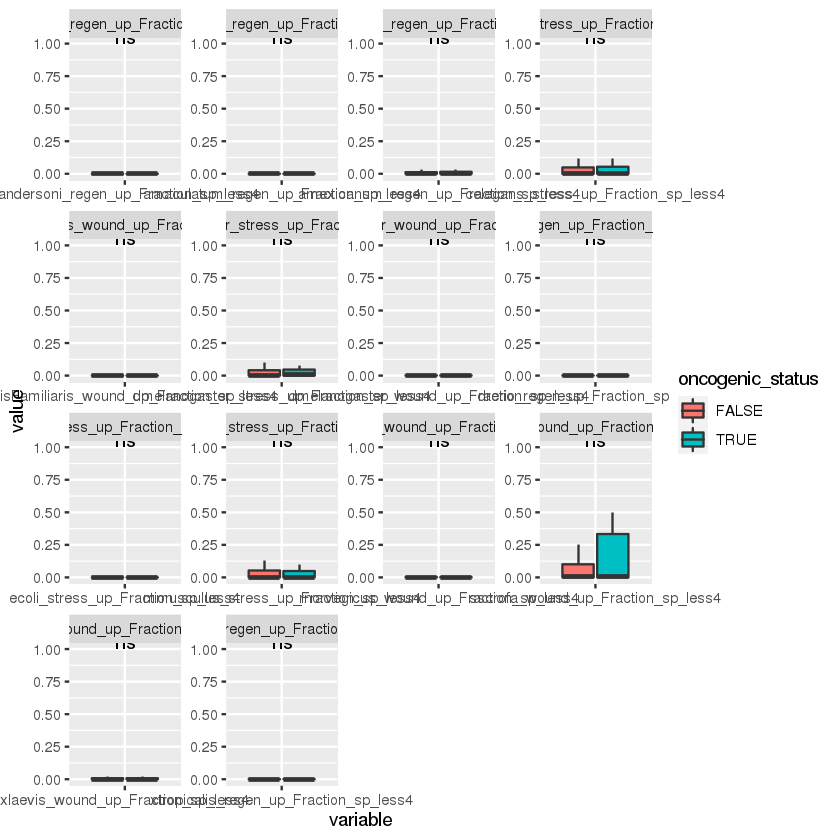

In [26]:
random_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "oncogenic_status" = rep(sample(fractions_combinedDF_SPEC_EXP$oncogenic_status), ncol(scale_spec_exp)))

ggplot(random_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = oncogenic_status), label = "p.signif")

Using  as id variables



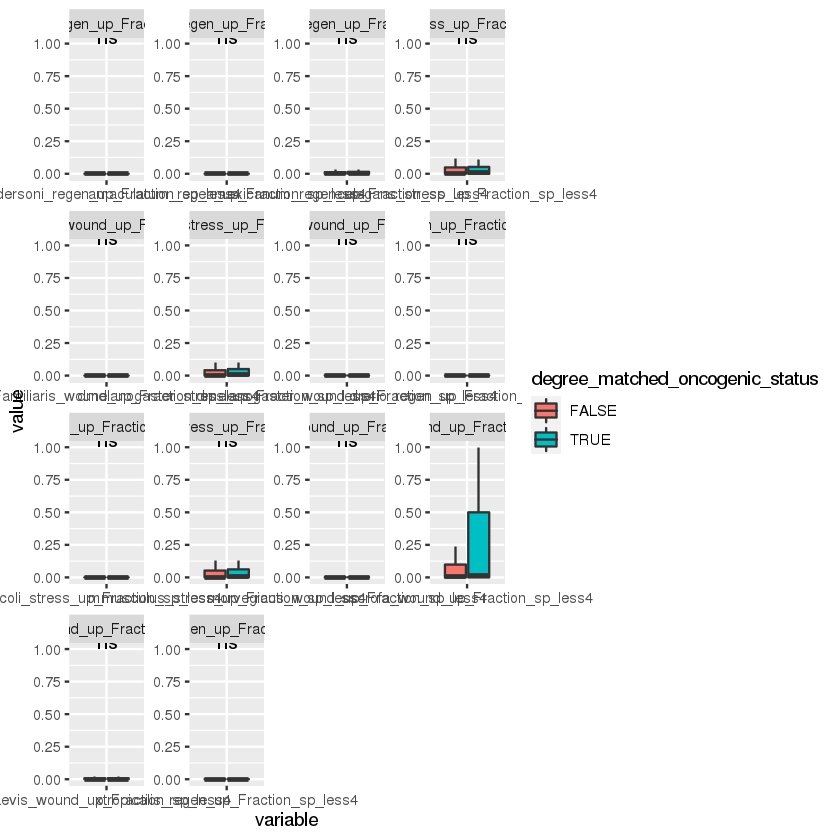

In [27]:
degree_matched_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$degree_matched_oncogenic_status, ncol(scale_spec_exp)))

ggplot(degree_matched_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = degree_matched_oncogenic_status), label = "p.signif")

Using  as id variables



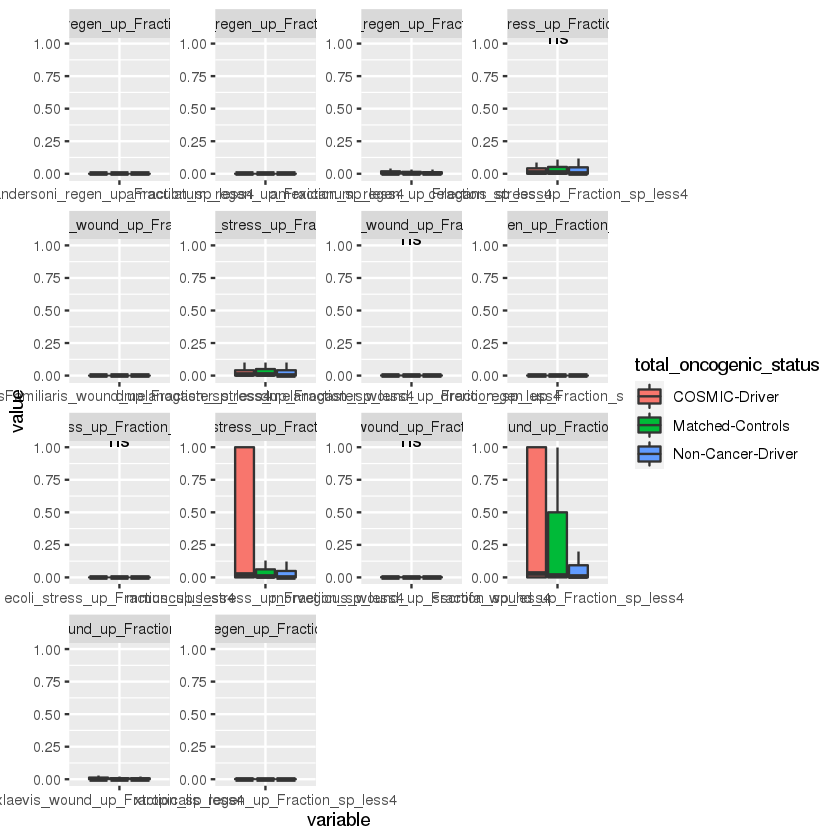

In [28]:
triple_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "total_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$total_oncogenic_status, ncol(scale_spec_exp)))

ggplot(triple_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = total_oncogenic_status), label = "p.signif")

### Downregulated

In [29]:
cols <- colnames(fractions_combinedDF_SPEC_EXP)[grep("down_Fraction_sp_less4",colnames(fractions_combinedDF_SPEC_EXP))]
colnames(fractions_combinedDF_SPEC_EXP[,..cols])

[1] "aandersoni_regen_down_Fraction_sp_less4"      
 [2] "amaculatum_regen_down_Fraction_sp_less4"      
 [3] "amexicanum_regen_down_Fraction_sp_less4"      
 [4] "celegans_stress_down_Fraction_sp_less4"       
 [5] "clupisFamiliaris_wound_down_Fraction_sp_less4"
 [6] "dmelanogaster_stress_down_Fraction_sp_less4"  
 [7] "dmelanogaster_wound_down_Fraction_sp_less4"   
 [8] "drerio_regen_down_Fraction_sp_less4"          
 [9] "ecoli_stress_down_Fraction_sp_less4"          
[10] "mmusculus_stress_down_Fraction_sp_less4"      
[11] "rnorvegicus_wound_down_Fraction_sp_less4"     
[12] "sscrofa_wound_down_Fraction_sp_less4"         
[13] "xlaevis_wound_down_Fraction_sp_less4"         
[14] "xtropicalis_regen_down_Fraction_sp_less4"

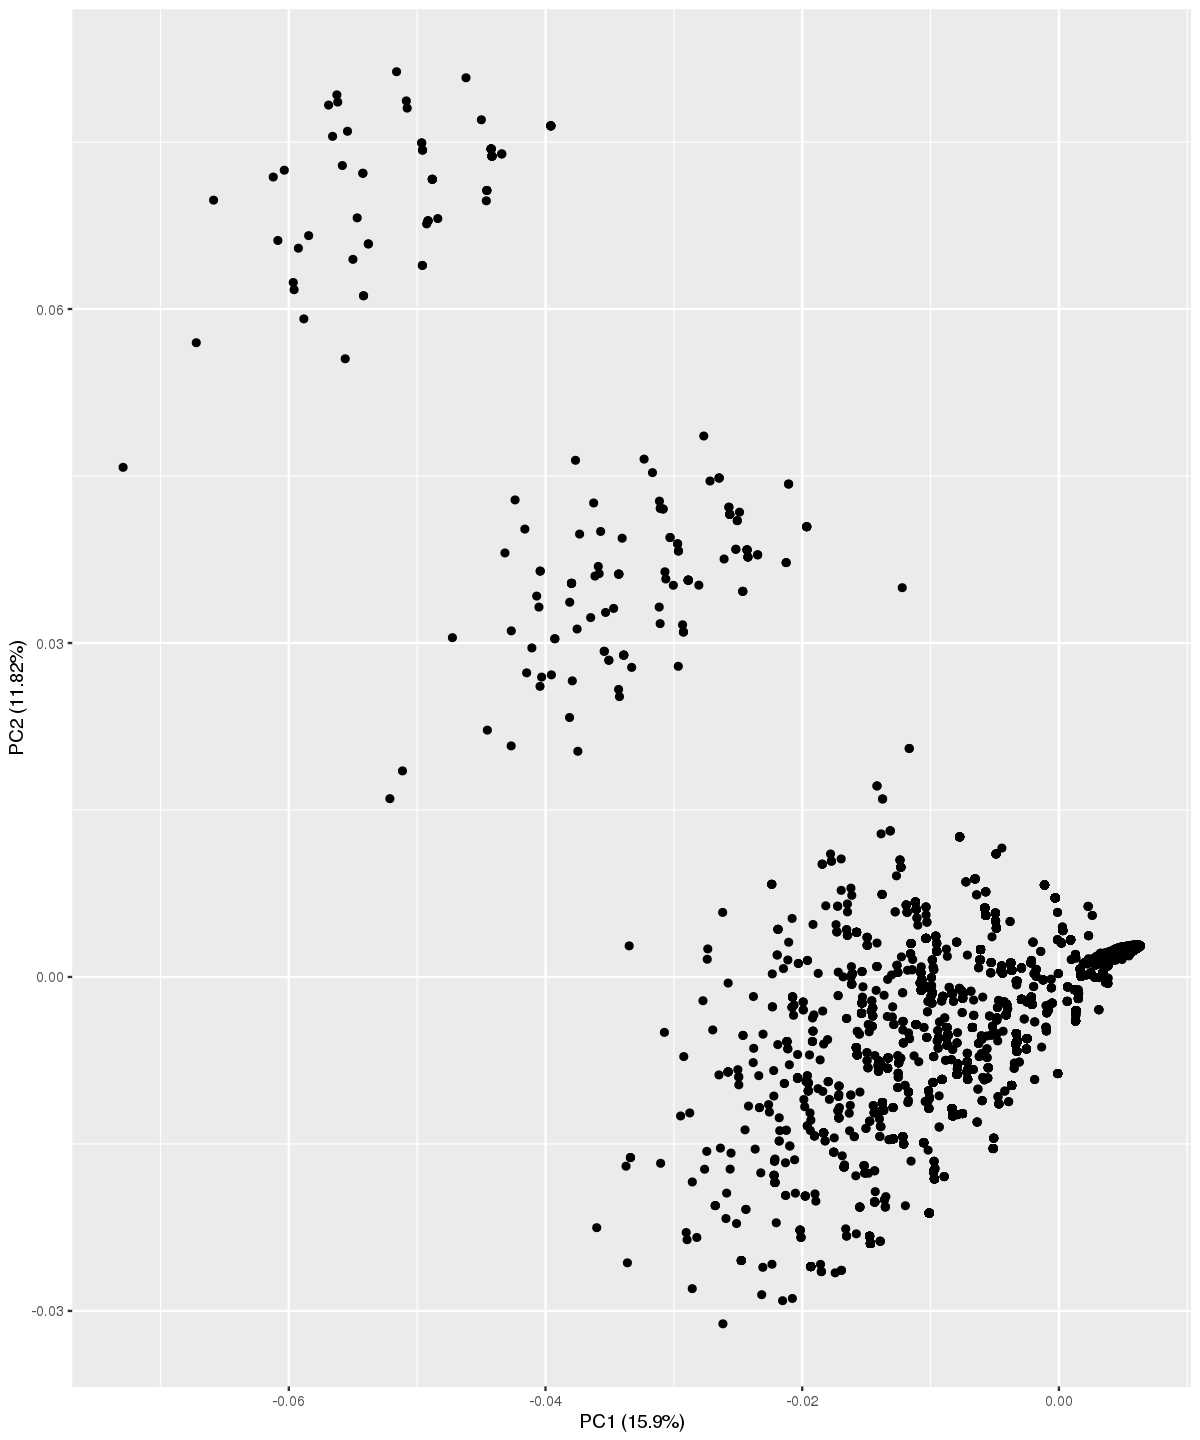

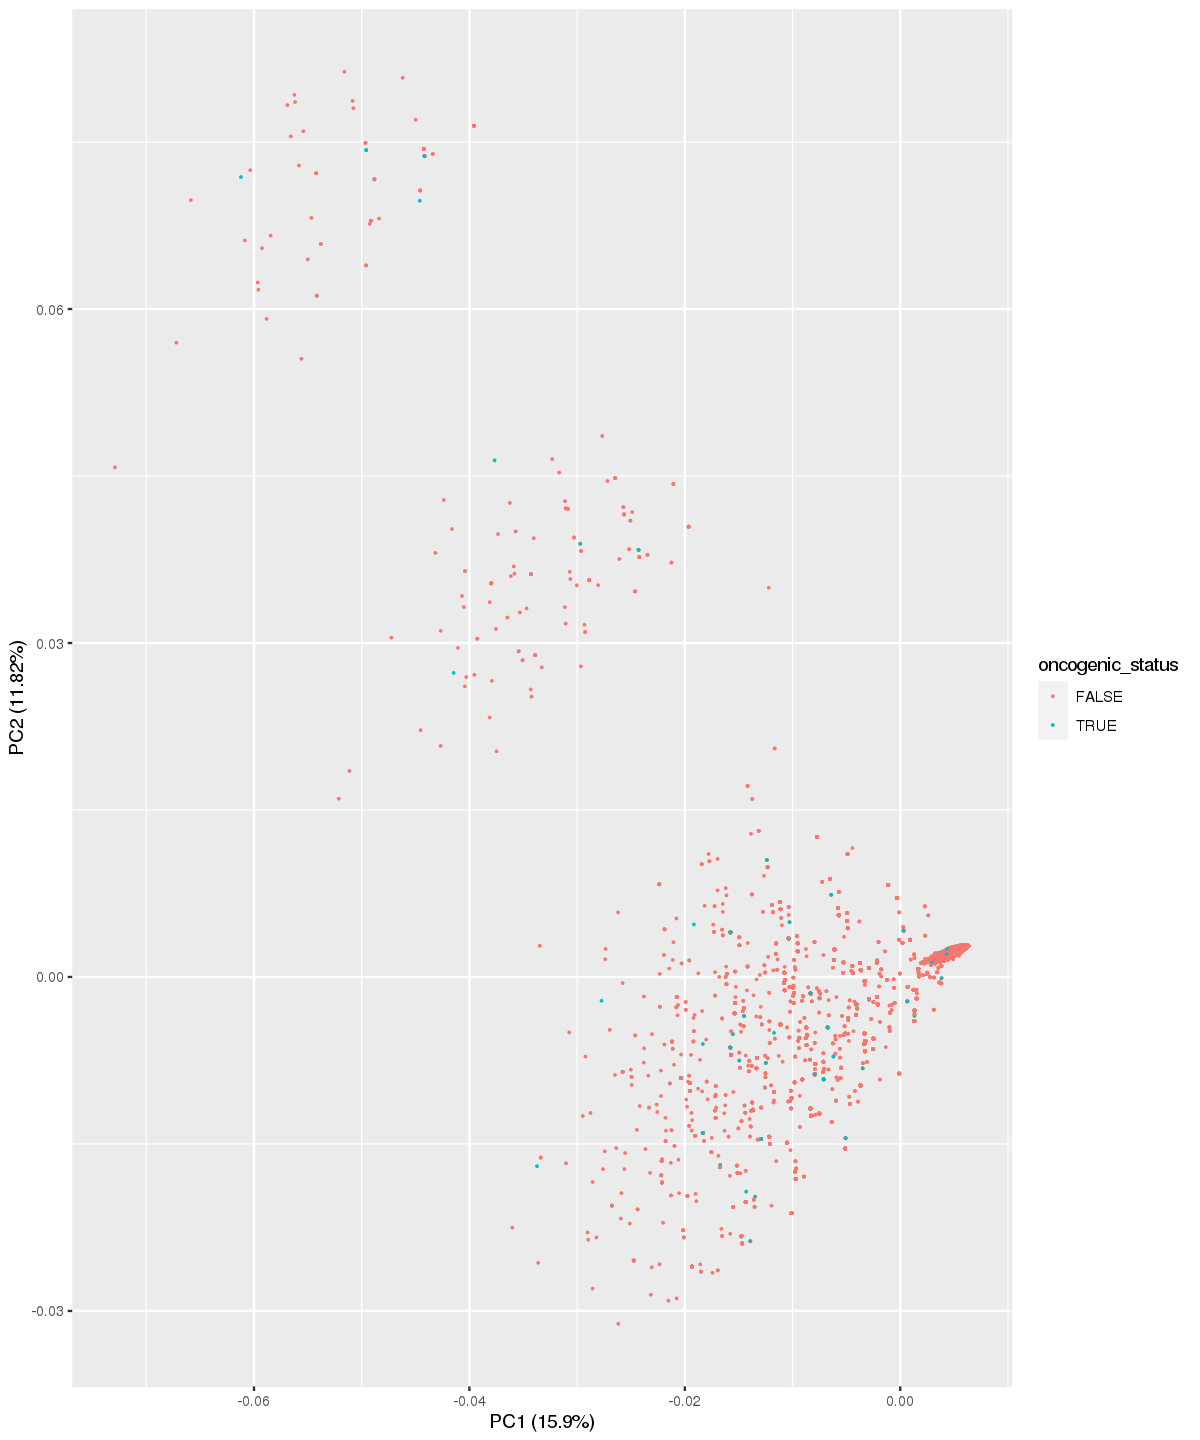

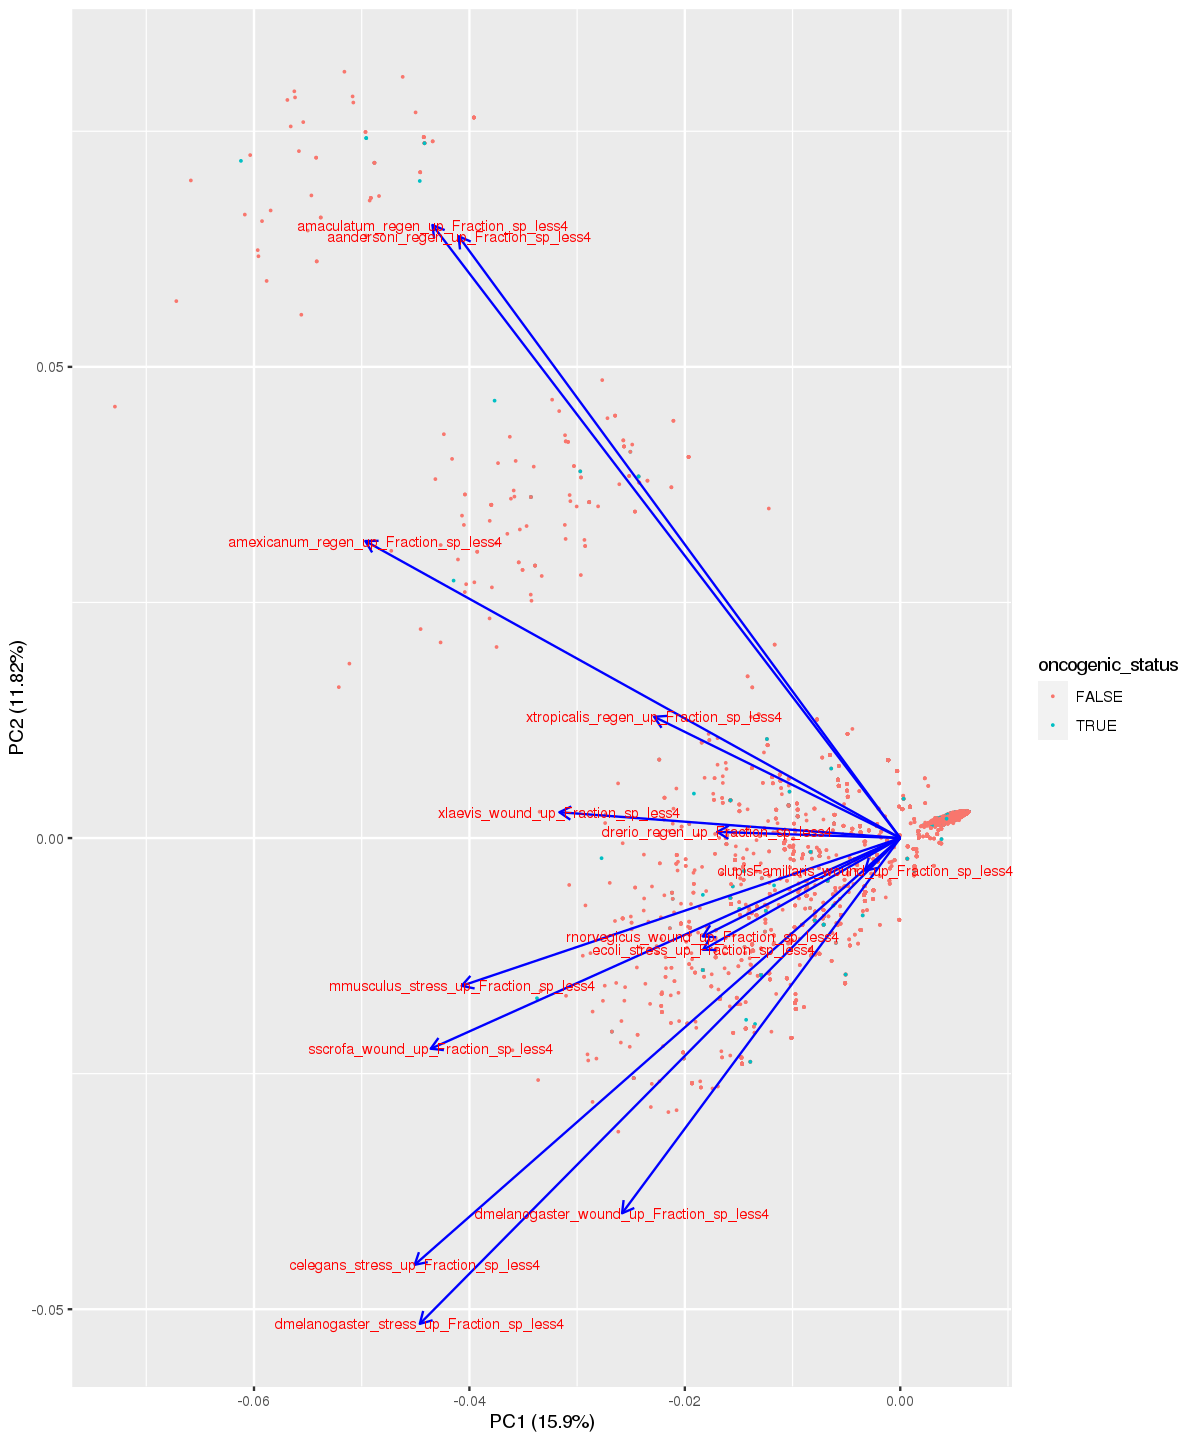

In [62]:
options(repr.plot.width=10, repr.plot.height=12)
scale_spec_exp_down <- fractions_combinedDF_SPEC_EXP[,..cols]
pca_res_spec_exp_down <- prcomp(scale_spec_exp_down, scale. = TRUE)
autoplot(pca_res_spec_exp_down)
autoplot(pca_res_spec_exp_down, data = fractions_combinedDF_SPEC_EXP,
         colour = 'oncogenic_status', size = .01)

autoplot(pca_res_spec_exp_down, data = fractions_combinedDF_SPEC_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3, size = .01)

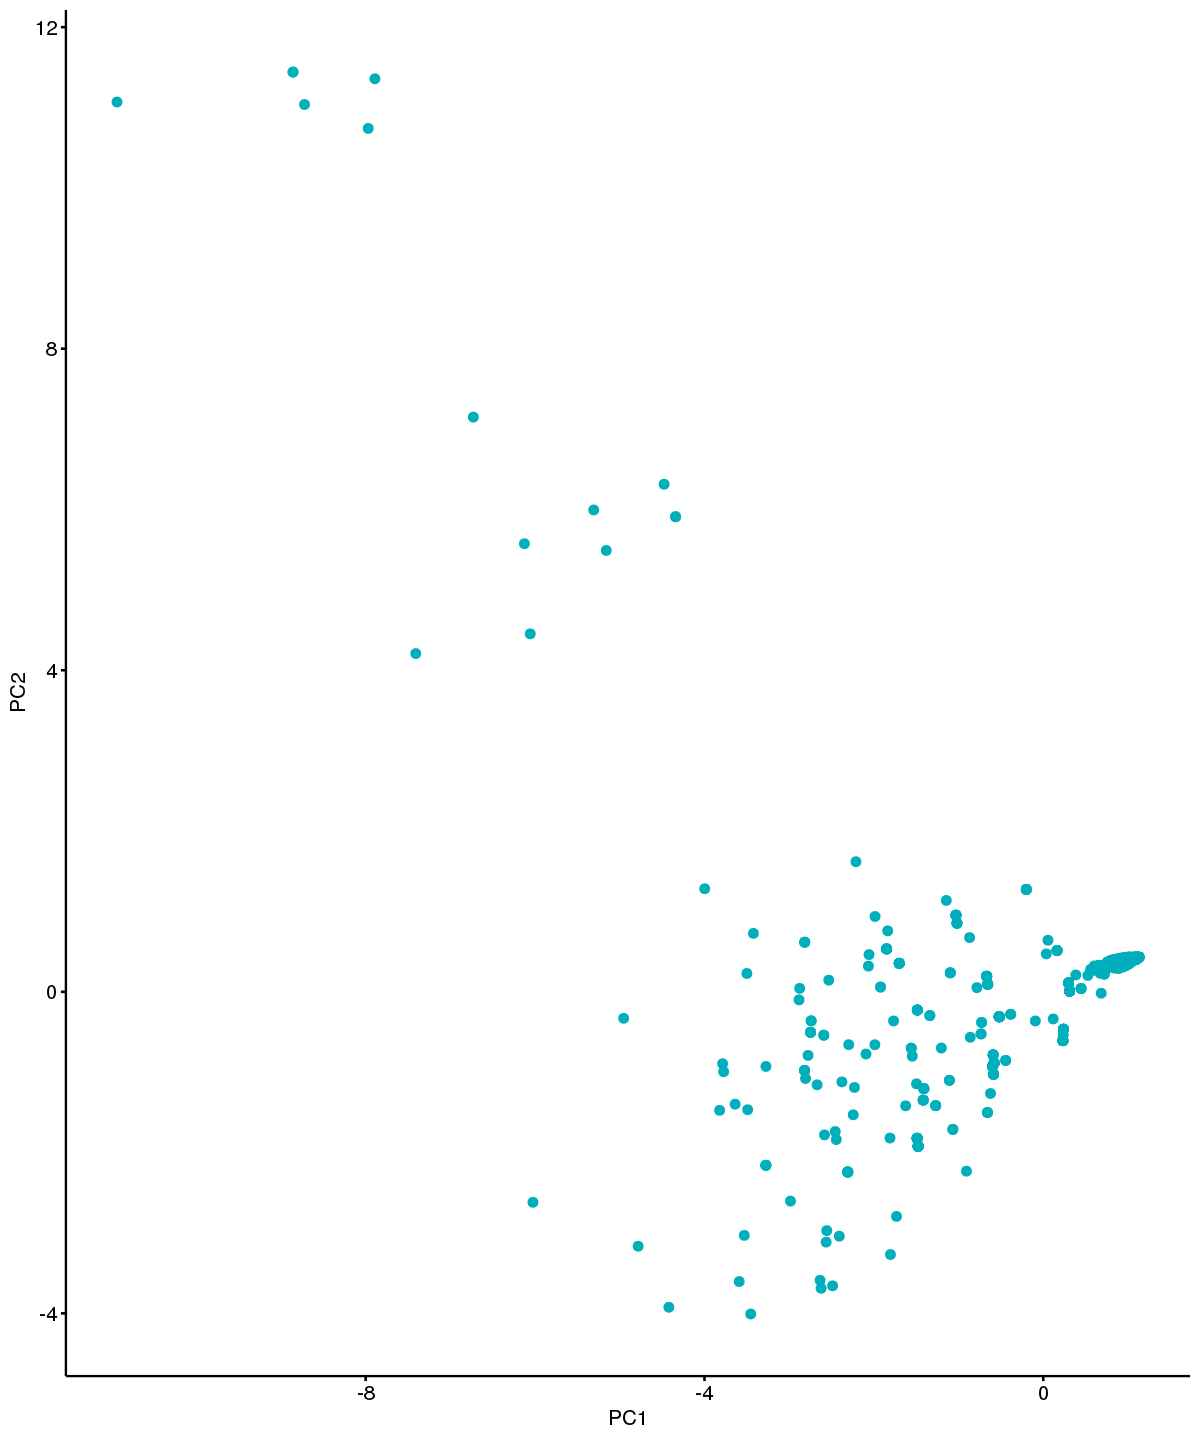

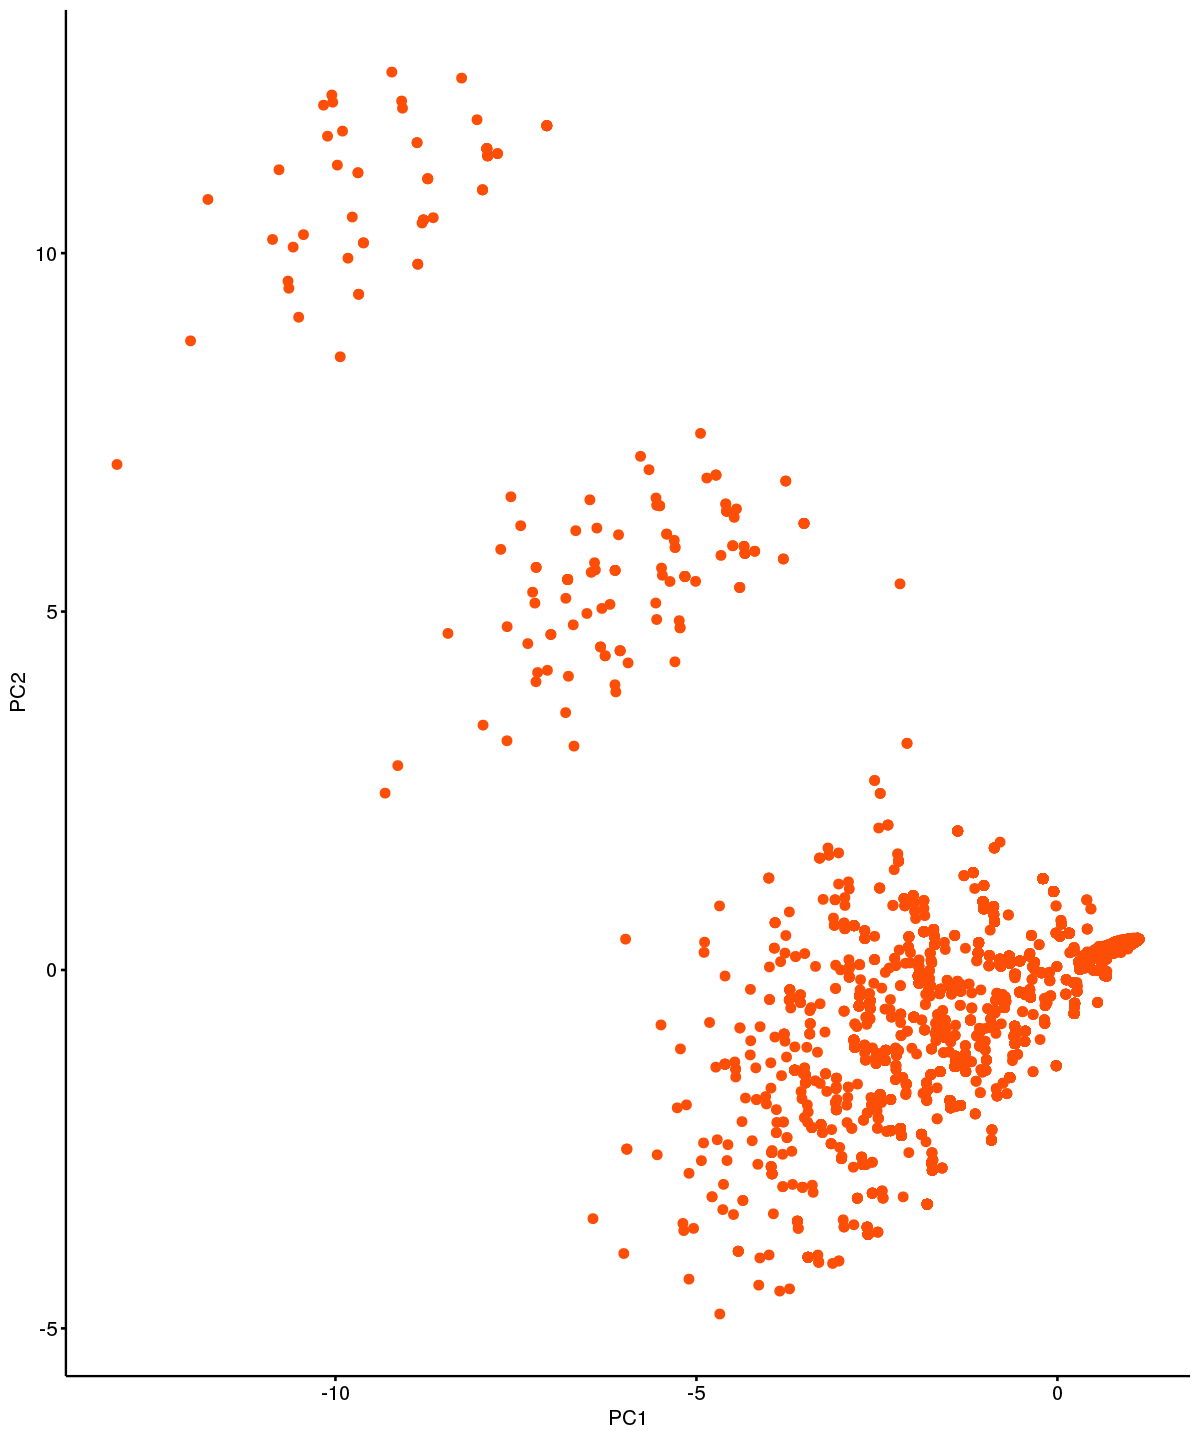

In [65]:
options(repr.plot.width=10, repr.plot.height=12)
onc_pca_spec_exp_down <- as.data.frame(pca_res_spec_exp_down$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_spec_exp_down, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_spec_exp_down <- as.data.frame(pca_res_spec_exp_down$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_spec_exp_down, x = "PC1", y = "PC2",
   color = "#FC4E07")


Using  as id variables



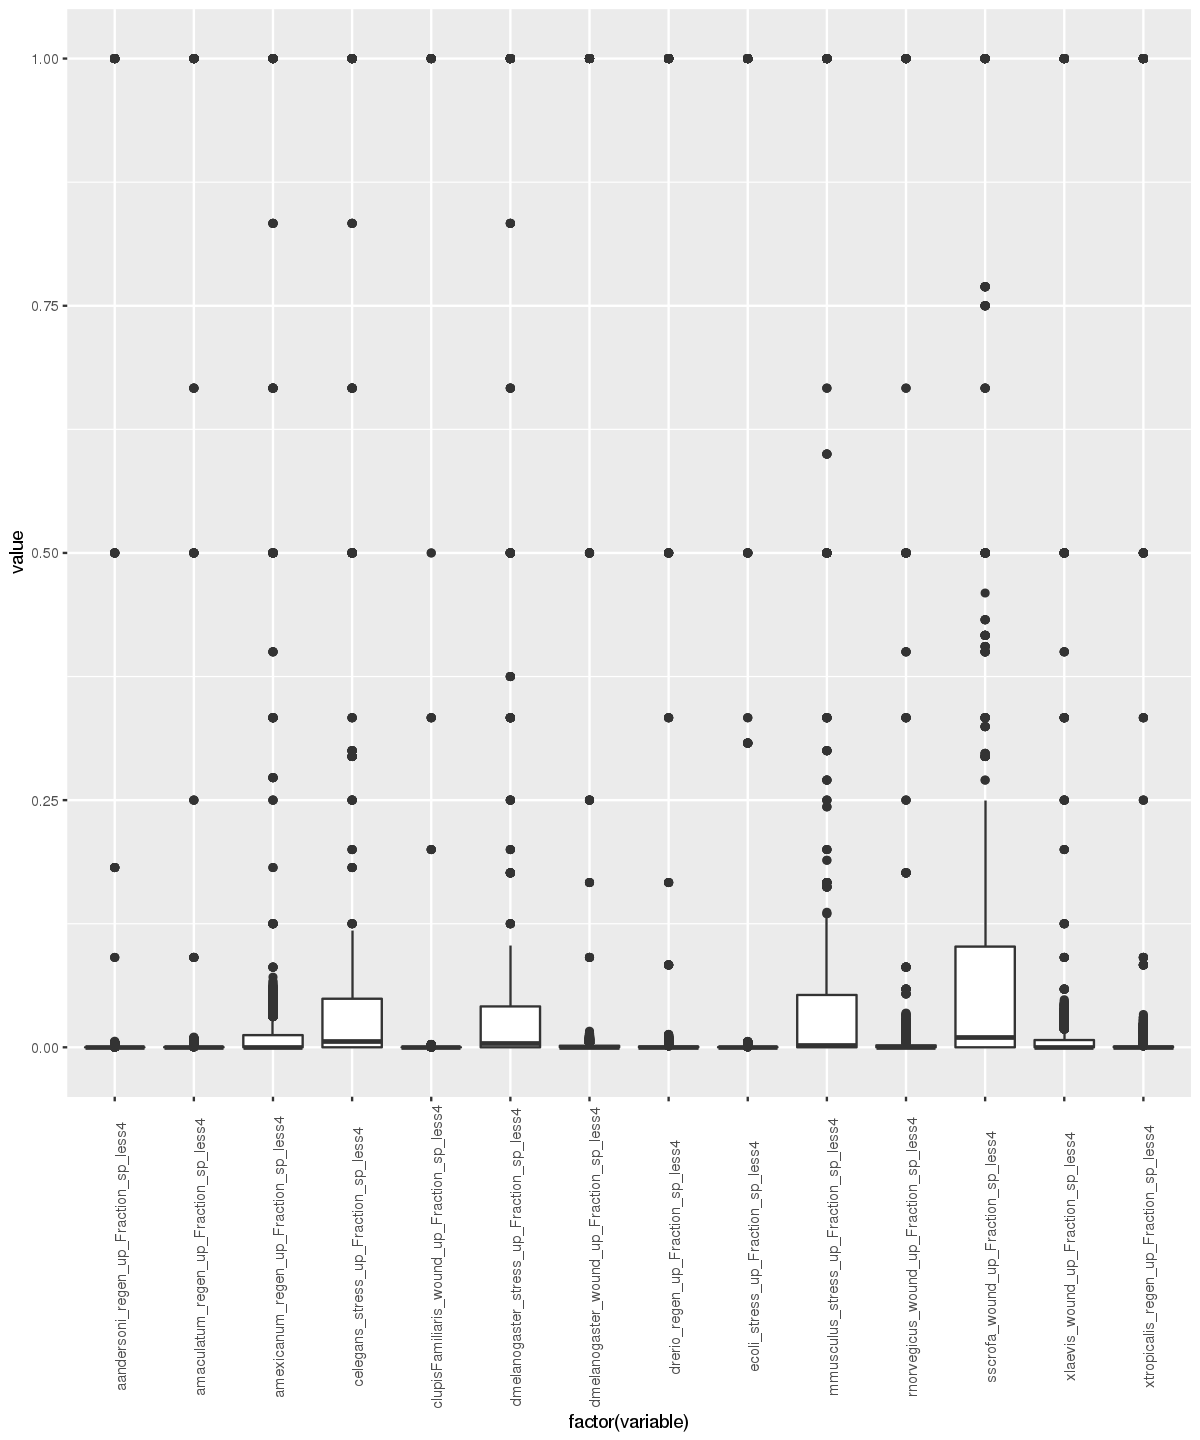

In [64]:
# fractions distributed
meltData_down <- melt(data.frame(scale_spec_exp_down))
p <- ggplot(meltData_down, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables



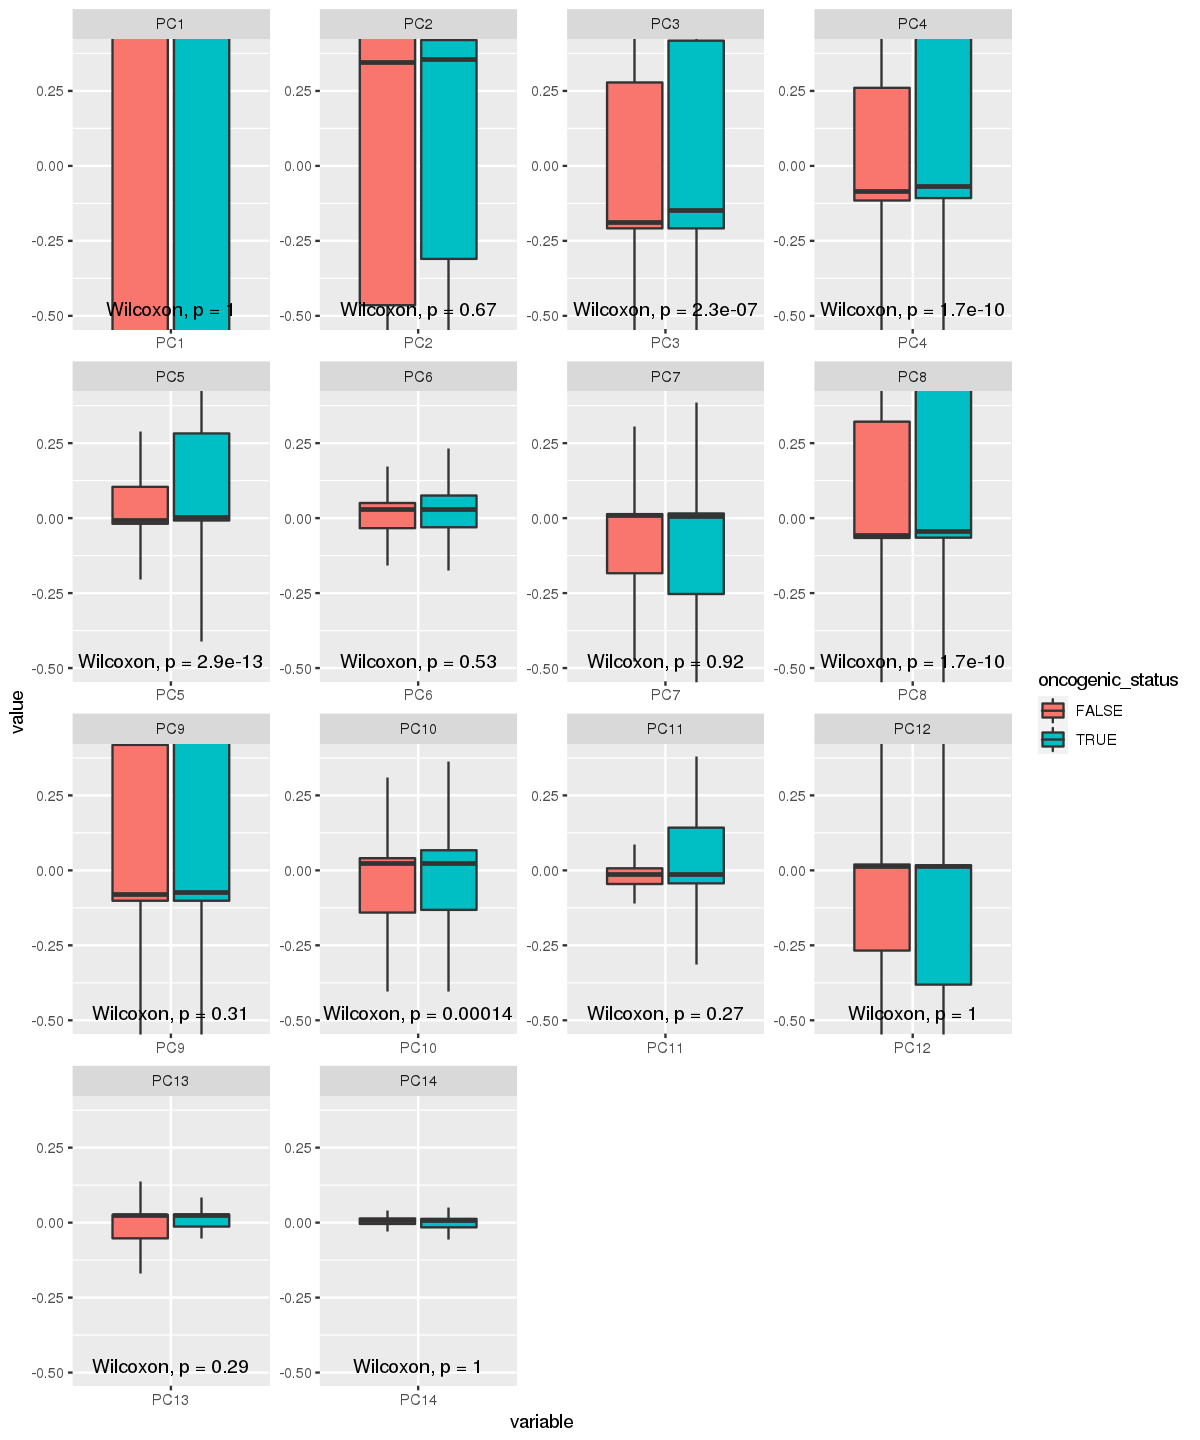

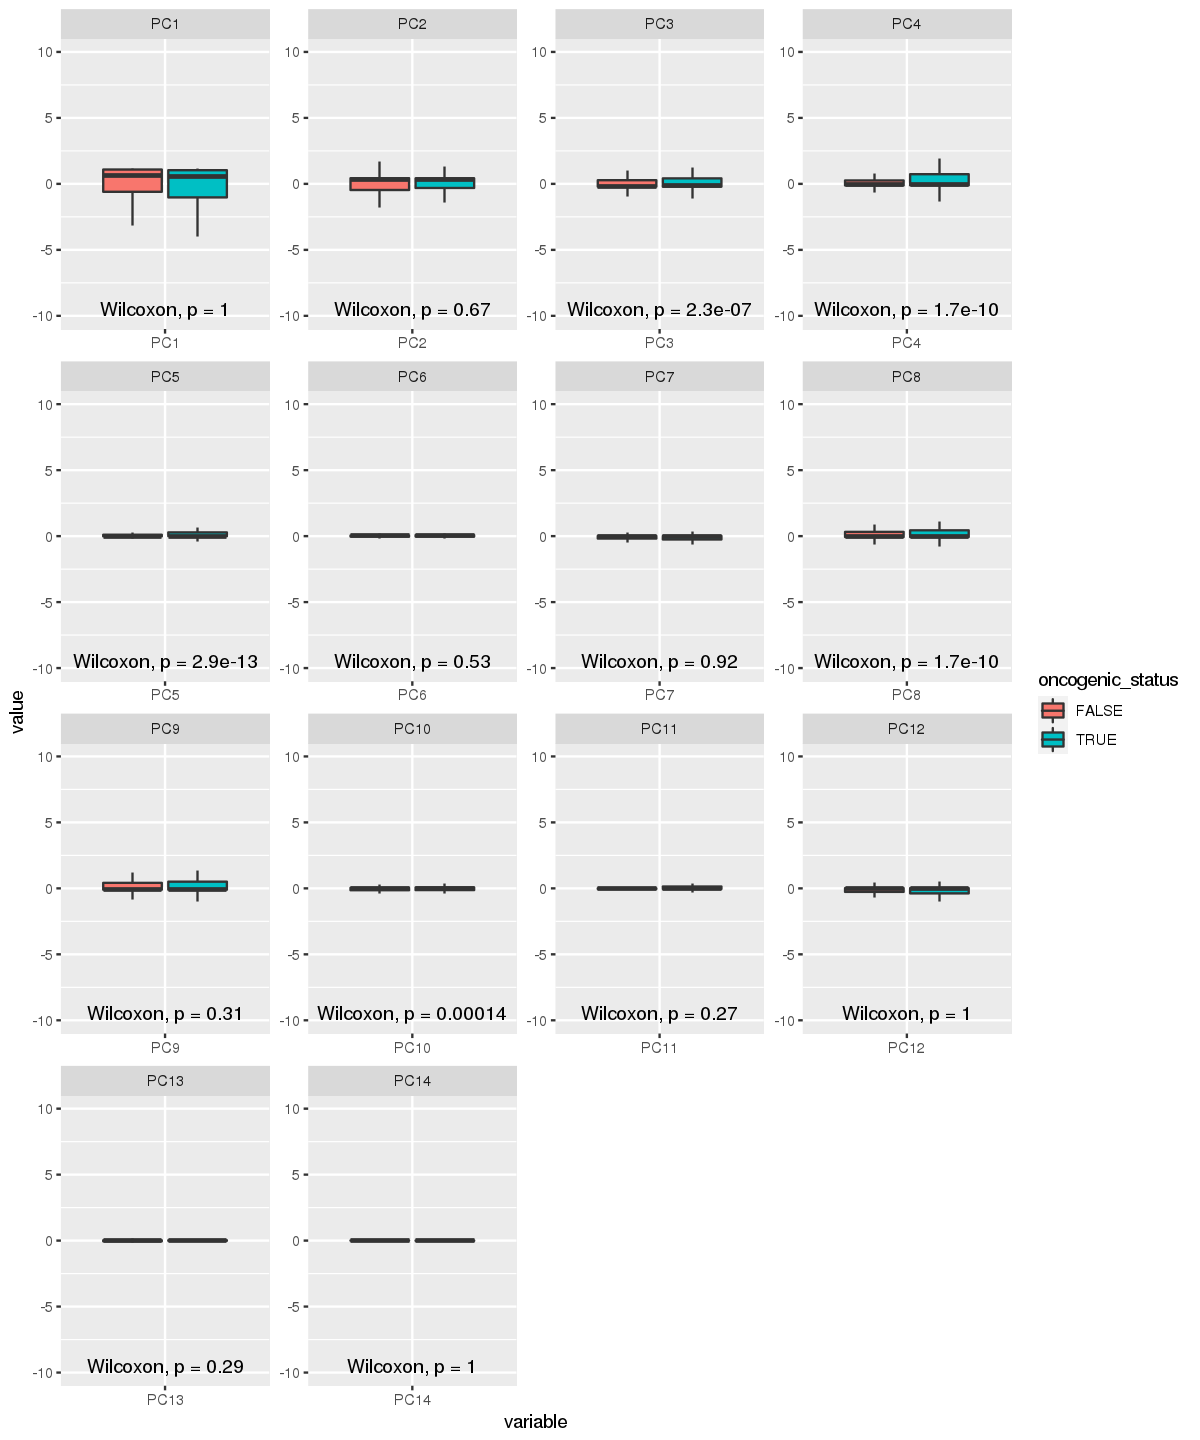

In [66]:
# pca distribution
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_down4 <- cbind(melt(as.data.frame(pca_res_spec_exp_down$x)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(pca_res_spec_exp_down$x)))

ggplot(pca_melted_down4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-.5, .38)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -.5)



ggplot(pca_melted_down4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-10, 10)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -10)

Using  as id variables



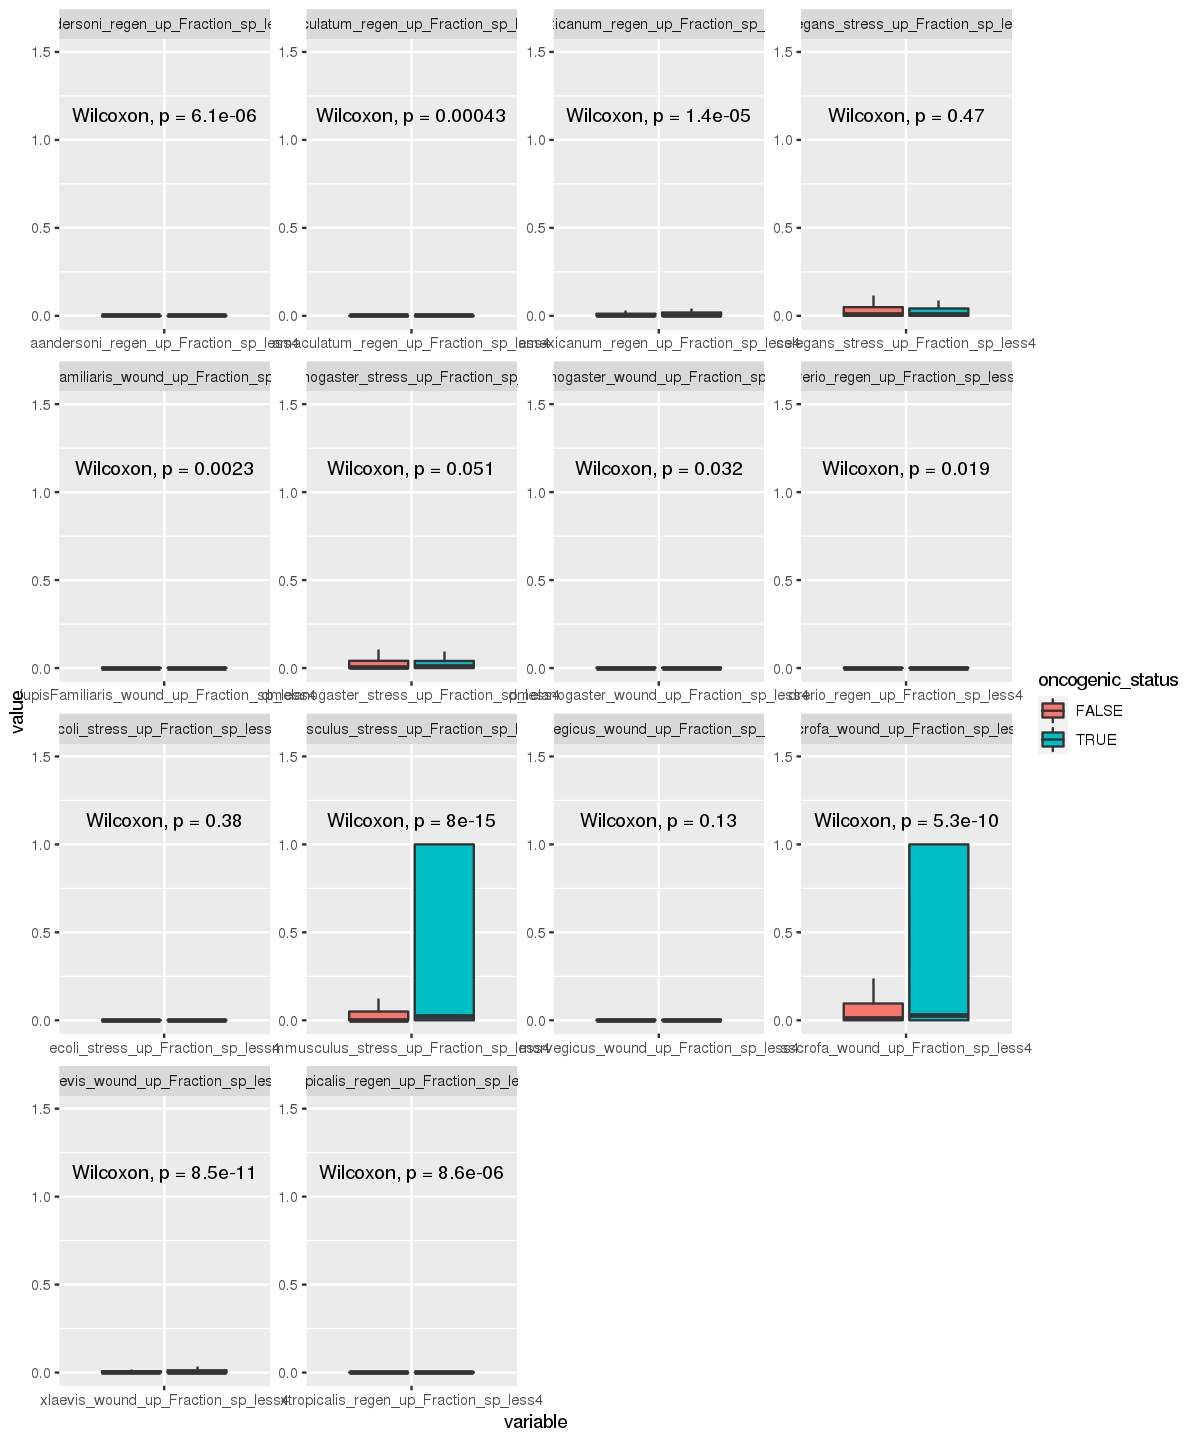

In [73]:
# fractions  distribution  oncogenic vs non
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, 1.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 1.1)

Using  as id variables



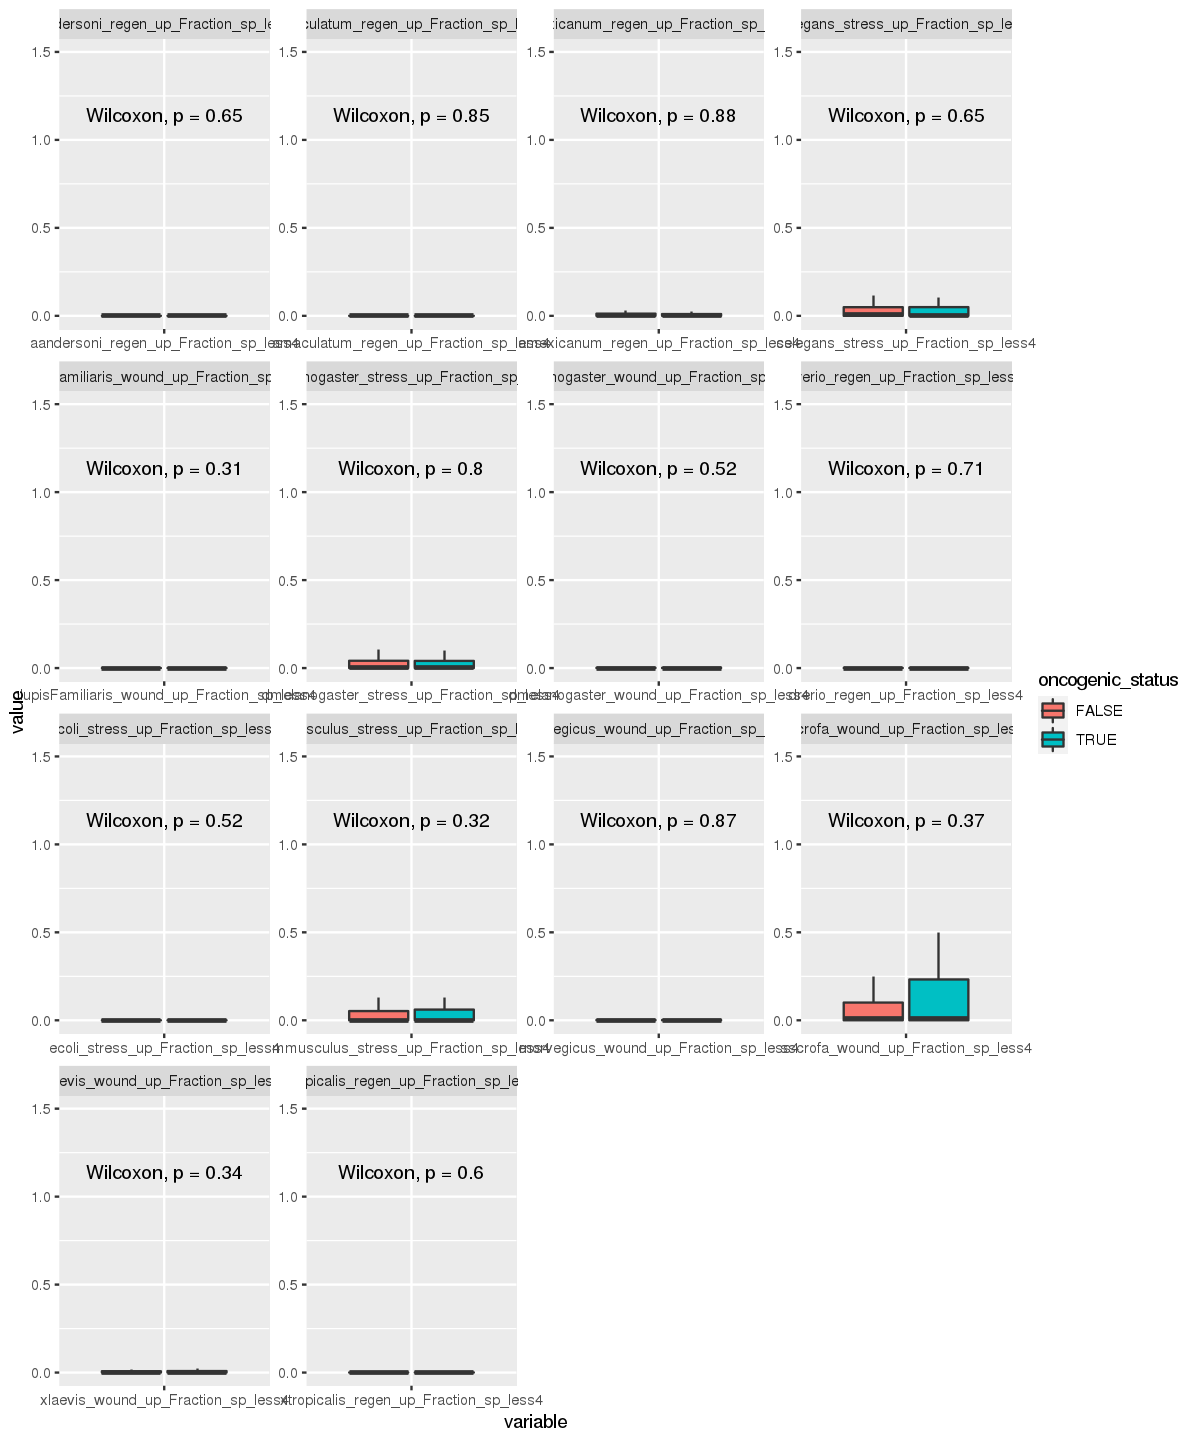

In [74]:
options(repr.plot.width=10, repr.plot.height=12)
random_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "oncogenic_status" = rep(sample(fractions_combinedDF_SPEC_EXP$oncogenic_status), ncol(scale_spec_exp_down)))

ggplot(random_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, 1.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 1.1)

Using  as id variables



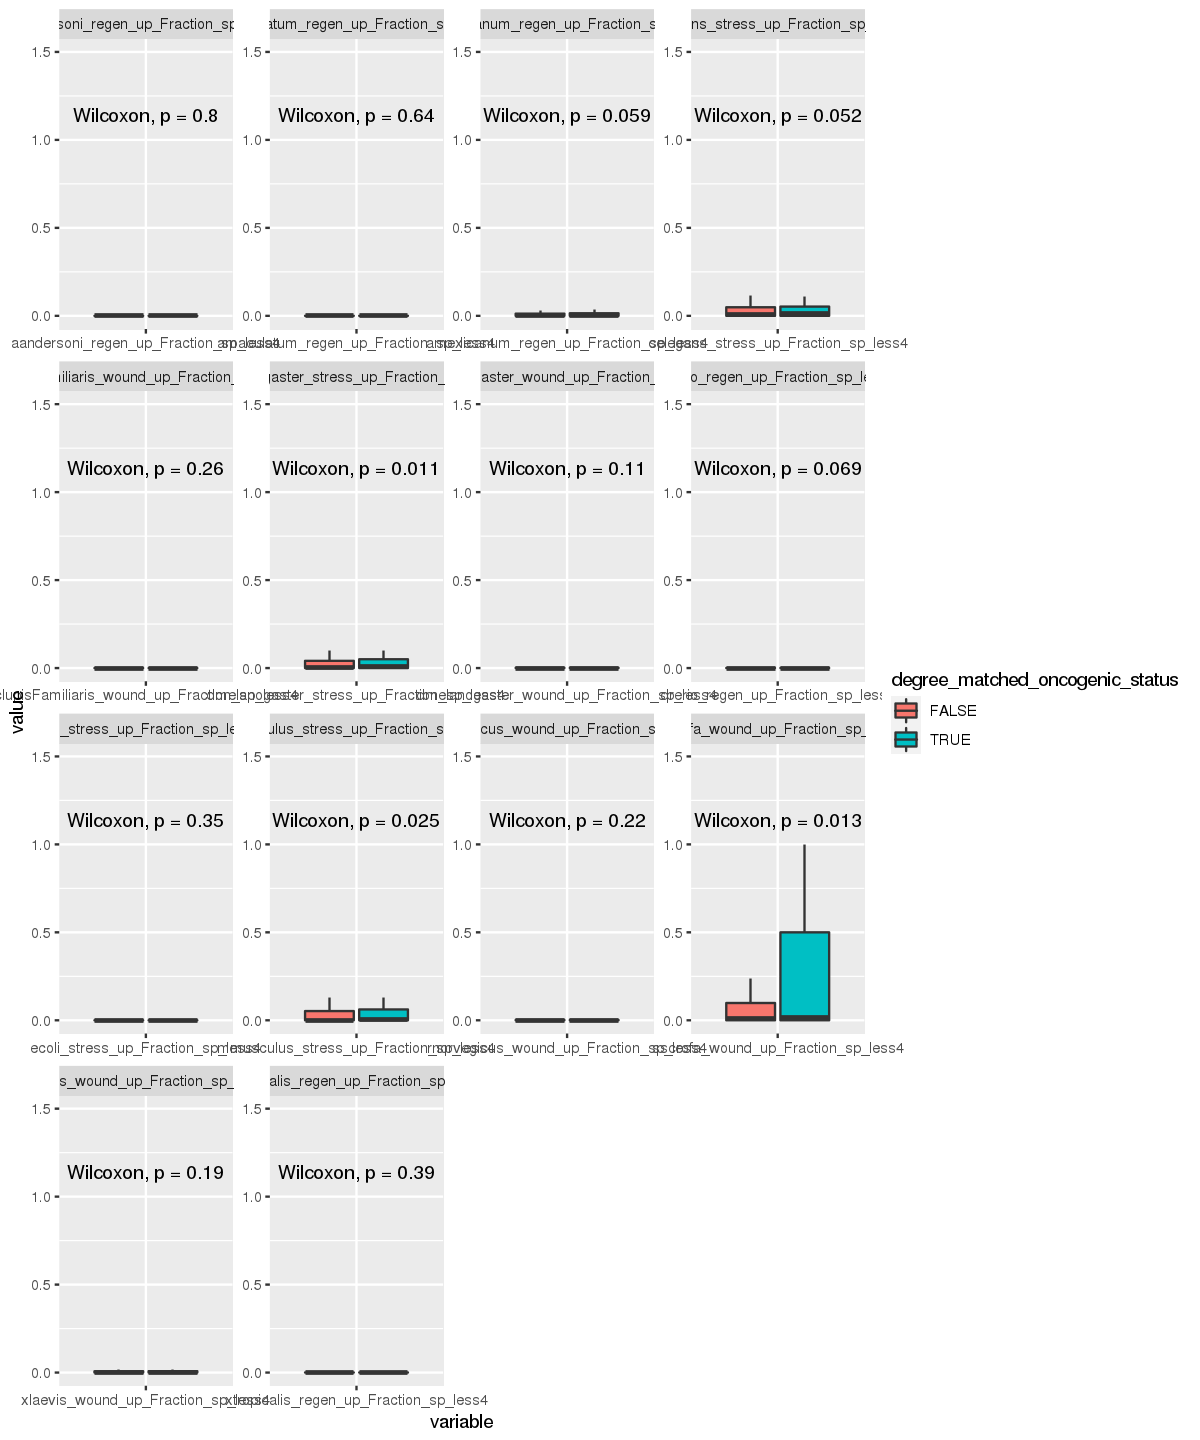

In [75]:
degree_matched_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$degree_matched_oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(degree_matched_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, 1.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = degree_matched_oncogenic_status),
                   label.y = 1.1)

Using  as id variables



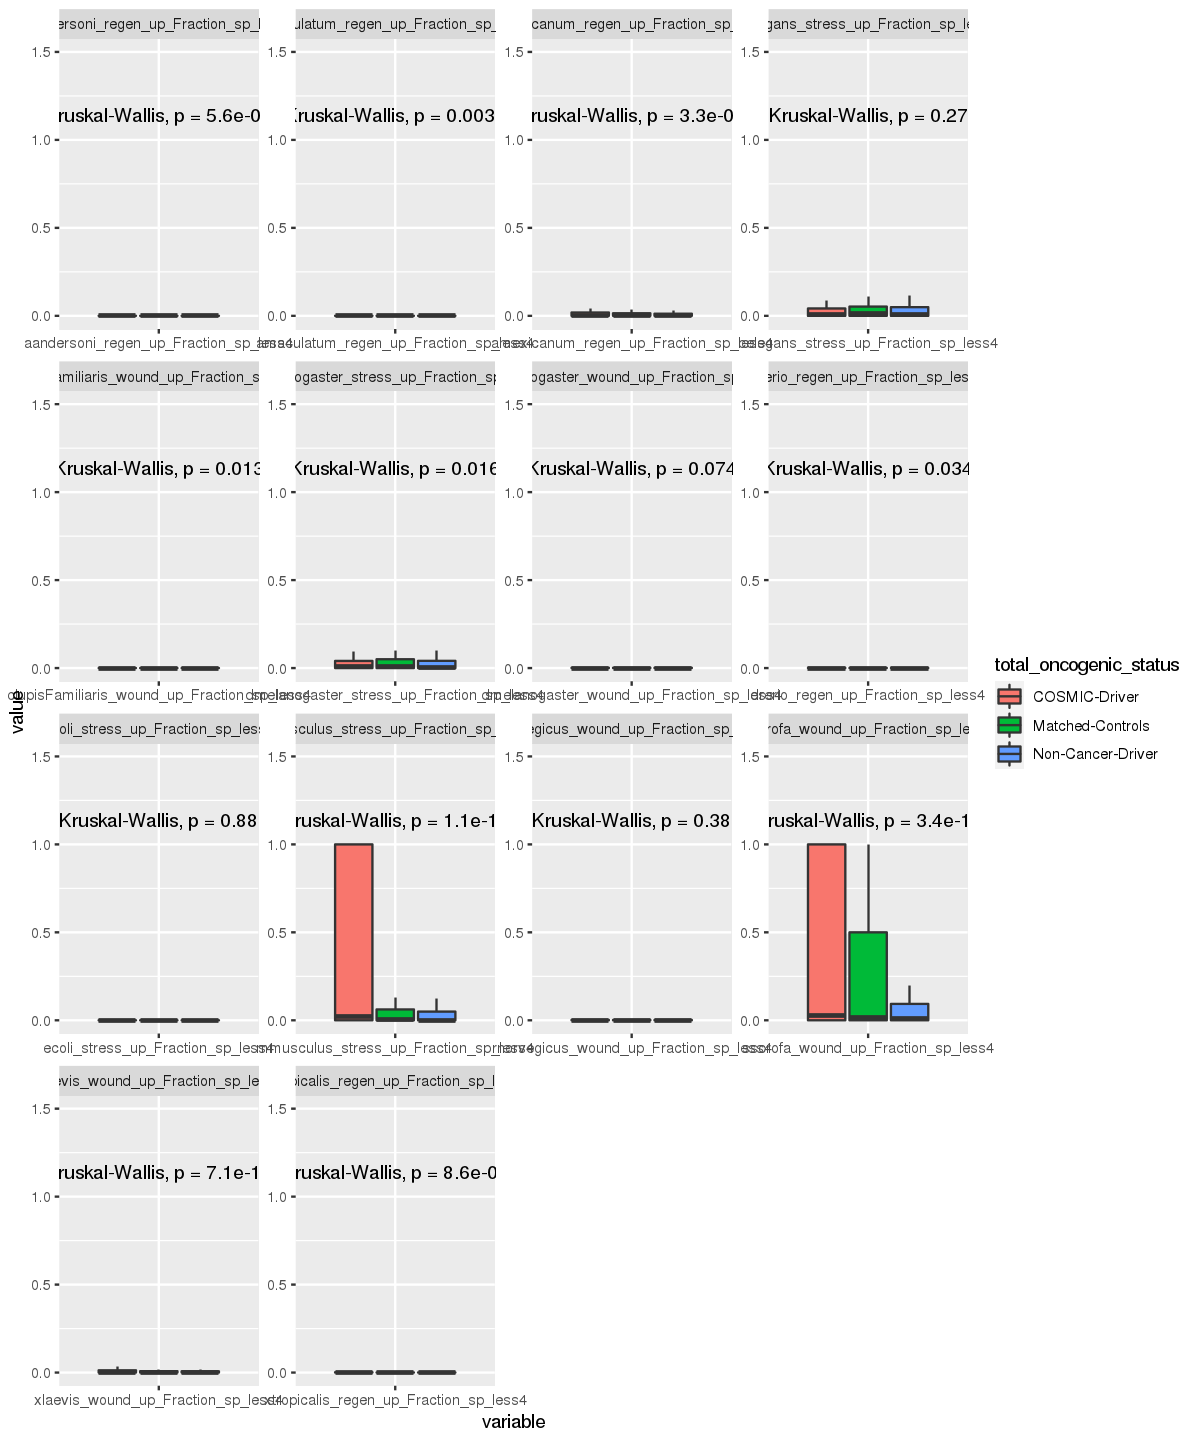

In [76]:
triple_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "total_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$total_oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(triple_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, 1.5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = total_oncogenic_status),
                   label.y = 1.1)